# **<font color='DarkGreen'><center>BA780 Team2 myAgro Data Analytics Project</center></span>**
### **<center>Team 2 Members: Xinyi (Esme) Li, Paul Seiters, Tripti Sharma, Shu Wang (Alex), Robert Zhang**


<img src="https://user-images.githubusercontent.com/94079366/200858425-1a8480f1-b8f5-498c-95dc-35f90c20df7b.png" width="230" align="left"/>
<img src="https://user-images.githubusercontent.com/94079366/200859683-942a2025-4615-4b5b-952a-83afe2aa6fd6.png" width="300" align="center"/>
<img src="https://user-images.githubusercontent.com/94079366/201549126-de4e0b13-051b-40a5-8b82-3d09215a5d4b.png" width="283" align="center"/>

---
### **<a id="Content"><font color="DarkGreen">Table of Content</a>**

1. [**<span><font color="DarkGreen">Project Objective and Data Source</span>**](#ProjectOverview)
1. [**<span><font color="DarkGreen">Exploratory Data Analysis</span>**](#EDA)
1. [**<span><font color="DarkGreen">Part1: Analysis of Key Variables Impacting Yields</span>**](#Part1)
1. [**<span><font color="DarkGreen">Part2: Geo-Analytics & Sales Patterns</span>**](#Part2)
1. [**<span><font color="DarkGreen">Conclusion & Recommendations</span>**](#Rec)
1. [**<span><font color="DarkGreen">References</span>**](#References)
---

### **<span id="ProjectOverview"> <font color="DarkGreen">0. Project Objective and Report Summary</span>**

#### **<font color='DarkGreen'>0.1 Project Objective:</font> Analyze Yield Patterns and Client Behavior to Improve myAgro’s Sales and Farm Yields**

#### **<font color='DarkGreen'>0.2 Problem Definition:</font>**

1. Our project goal is to improve myAgro's sales and farmers' yields by analyzing key variables and comparing high-yield groups with low-yield ones. We believe this is an important because our insights could help myAgro provide better services and improve sales strategy to empower smallholder farmers. 
2. The motivation behind our project is to help myAgro bring financial stability to farmers and provide easier access to necessary farming resources. 

*Source:* [A Transparent, Easy Way For Smallholder Farmers To Save](https://www.myagro.org/media-post/a-transparent-easy-way-for-smallholder-farmers-to-save/) by myAgro.

#### **<font color='DarkGreen'>0.3 Description of Data and Datasource:</font>**

The data is based on myAgro’s data warehouse, which documents transaction-specific and geographic information. The dataset contains 4 CSV files: client, harvest, package, and payment, where each file has more than 2,000 rows and 20 columns. In particular, the harvest table only contains a sample of clients who participated in myAgro's harvest measure activities, so it has fewer rows compared to the rest.


#### **<font color='DarkGreen'>0.4 Report Summary:</font>**

**To achieve our goal, we analyzed the following issues for our final project:**

1. **Exploratory Data Analysis:** We merged key tables and selected important variables from them to conduct our analysis. Visualization of null values in our dataset helps me determine that missing values are randomly distributed, so there is no pattern.
1. **Part I:** Analyzes how crop yield differs across types, countries, seasons, etc. Data visualization also reveals how yield is impacted by gender among clients. Such initial analysis will provide myAgro with insights into how yield and sales change over time, and focus on certain client groups. 
1. **Part II:** Performs geo-analytics to visualize village distribution and area for future market expansion. Analysis on high-yield villages helps myAgro understand the relationship between high yields in the previous year and sales in the next year to make informed decisions. Trainings provided to clients are also evaluated based on customer ratings, and myAgro's training quality received high recognition from farmers. 
1. Finally, we made recommendations for myAgro to implement referral programs, experiment with intercropping methods, and adopt integrated data collection system to improve future sales and enhance farming yields. 

___

### **<span id="EDA"> <font color="DarkGreen">1. Exploratory Data Analysis</span>**

#### **1.1 Import Python Libraries and Data Loading**

In [ ]:
# importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
%config InlineBackend.figure_format = 'retina'

!pip install matplotlib --upgrade
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 5.1 MB/s 
     |████████████████████████████████| 295 kB 52.2 MB/s 
     |████████████████████████████████| 965 kB 58.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# load all data
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/BA780_Team2/myagro_data_new/'

Mounted at /content/drive


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.8 MB/s 
     |████████████████████████████████| 7.8 MB 61.9 MB/s 
     |████████████████████████████████| 16.6 MB 33.9 MB/s 


#### **1.2 Import myAgro Dataset**

In [ ]:
client_raw = pd.read_csv(data_folder + 'myagro_client.csv')
client_raw.info()  
client_raw.head(3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494142 entries, 0 to 494141
Data columns (total 31 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   code                                      494142 non-null  object 
 1   this_season_first_package_selection_date  124704 non-null  object 
 2   enrollment_date                           118723 non-null  object 
 3   most_recent_year_enrolled                 317030 non-null  float64
 4   most_recent_year_delivered                185128 non-null  float64
 5   sex                                       484278 non-null  object 
 6   age                                       138862 non-null  float64
 7   delivered_amount_this_season              494142 non-null  float64
 8   is_certified_for_delivery                 494142 non-null  bool   
 9   balance                                   494142 non-null  float64
 10  group_leader        

,code,this_season_first_package_selection_date,enrollment_date,most_recent_year_enrolled,most_recent_year_delivered,sex,age,delivered_amount_this_season,is_certified_for_delivery,balance,...,this_season_packages,is_delivered_last_season,main_package,zone_code,district_name,country_name,ve_code,delivery_village_code,sl_code,fc_code
0,146455,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,0.0,...,NaN,False,NaN,UNS,NaN,Senegal,NaN,NaN,NaN,NaN
1,10681524,2022-08-24 00:00:00,2022-08-24T00:00:00.000Z,2023.0,2022.0,Male,45.0,0.0,False,109800.0,...,Sunflower Hybrid 0.5,True,Sunflower Hybrid - 0.5,KLW,NaN,Tanzania,NaN,TB543,NaN,NaN
2,2939199,2022-11-27 00:00:00,2022-11-27T00:00:00.000Z,2023.0,NaN,Female,34.0,0.0,False,2000.0,...,Arachide + Gombo 0.125,False,Arachide + Gombo - 0.125,KLD,Bougouni,Mali,KLD20,KE492,60520,40015


In [ ]:
harvest_raw = pd.read_csv(data_folder + 'myagro_harvest.csv')
harvest_raw.info()  
harvest_raw.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   client_code                          3181 non-null   int64  
 1   season                               3181 non-null   int64  
 2   crop                                 3181 non-null   object 
 3   farmer_total_hectares                3162 non-null   float64
 4   myagro_seasons                       3161 non-null   float64
 5   age_over_30                          3162 non-null   object 
 6   field_geolocation                    3171 non-null   object 
 7   yield                                3181 non-null   float64
 8   planted_using_myagro_semoir          3154 non-null   object 
 9   staff_measured_plot                  3154 non-null   object 
 10  staff_present_fertilizer             3154 non-null   object 
 11  fertilizer_applied_area_measur

,client_code,season,crop,farmer_total_hectares,myagro_seasons,age_over_30,field_geolocation,yield,planted_using_myagro_semoir,staff_measured_plot,...,module_4_attended,module_5_attended,trainings_attended,trainings_influence_rating,compost,compost_increased,myagro_vs_other_plots_rating,more_time_for_myagro_rating,harvest_result_rating,myagro_vs_nonmyagro_rating
0,2160586,2021,arachide,1.0,1.0,True,13.3535304 -7.9344277 443.35 9.64,0.788679,False,True,...,False,False,2.0,3.0,False,NaN,3.0,4.0,3.0,3.0
1,1105697,2021,arachide,0.5,2.0,True,11.1656241 -7.155164 424.19 5.36,1.822388,False,True,...,False,False,0.0,NaN,True,False,3.0,1.0,3.0,2.0
2,1094222,2021,arachide,1.0,3.0,True,12.3308983 -7.99085 381.09 6.9,0.634921,False,True,...,False,False,1.0,2.0,False,NaN,5.0,5.0,3.0,5.0


In [ ]:
package_raw = pd.read_csv(data_folder + 'myagro_package.csv')
package_raw.info()  
package_raw.head(3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610343 entries, 0 to 610342
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   package_code             610343 non-null  object 
 1   client_code              610343 non-null  object 
 2   package_enrollment_date  0 non-null       float64
 3   price                    610341 non-null  float64
 4   product                  610343 non-null  object 
 5   hectares                 610343 non-null  float64
 6   is_delivered             610343 non-null  bool   
 7   created_date             610343 non-null  object 
 8   delivered_date           90023 non-null   object 
 9   season                   610343 non-null  object 
dtypes: bool(1), float64(3), object(6)
memory usage: 42.5+ MB


,package_code,client_code,package_enrollment_date,price,product,hectares,is_delivered,created_date,delivered_date,season
0,a0K0J00000dAJHAUA4,1062398,NaN,33000.0,Mais HYB + Maraichage + Insecticide : Kabamano...,0.125,True,2019-05-24T00:00:00.000Z,NaN,ML 2019
1,a0K0J00000dAJHGUA4,1050799,NaN,17500.0,Arachide PDS + Maraichage : Arachide Sans Seme...,0.250,True,2019-05-24T00:00:00.000Z,NaN,ML 2019
2,a0K0J00000dAJHIUA4,35429,NaN,33000.0,Mais HYB + Maraichage + Insecticide : Kabamano...,0.125,True,2019-05-24T00:00:00.000Z,NaN,ML 2019


In [ ]:
payment_raw = pd.read_csv(data_folder + 'myagro_payment.csv')
payment_raw.info()  
payment_raw.head(3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111954 entries, 0 to 4111953
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   payment_code     object 
 1   date_received    object 
 2   amount           float64
 3   is_rollover      bool   
 4   is_audit         bool   
 5   program          object 
 6   is_mobile_money  bool   
 7   client_code      object 
 8   amount_enrolled  float64
 9   season           object 
dtypes: bool(3), float64(2), object(5)
memory usage: 231.4+ MB


,payment_code,date_received,amount,is_rollover,is_audit,program,is_mobile_money,client_code,amount_enrolled,season
0,a0N5I00000ME5QhUAL,2021-11-17 08:23:42,2000.0,False,False,NaN,False,1943768,NaN,SN 2022
1,a0N0J00000OxuOiUAJ,2020-01-05 17:10:55,1000.0,False,False,NaN,False,1034664,NaN,ML 2020
2,a0N0J00000OxuPHUAZ,2020-01-05 17:11:34,1000.0,False,False,NaN,False,1034093,NaN,ML 2020


#### **1.3 Data Cleaning & Attribute Selection**

In this part, we selected key variables we want to use for our analysis. Selection of variables are explained in the following:
<font color='DarkGreen'>

**ATTRIBUTES:**

**1. client_raw.csv**

| Column Name | Data Type | Description/Notes | 
|:----:|:----:|:----|
| code |  object | Unique identifier of the client |
| sex | object | Client gender |
| age | float | Client age |
| village_code | object | Unique identifier of the village where the client is located |
| zone_code | object | Unique identifier of the zone where the client is located |
| delivered_amount_this_season | float | Value of packages delivered to client in CFA (Mali & Senegal) |

**Rationale:** `sex` and `age` are useful when comparing yields in myAgro's client groups. `village_code` is used to identify high-yield villages and calculate average yield across Mali and Senegal. `delivered_amount_this_season` measures how clients' purchase patterns change over time. 

**2. harvest_raw.csv**

| Column Name | Data Type | Description/Notes |
|:----:|:----:|:----|
| client_code |  object | |
| season | int | The season that data was collected (recorded in year) |
| crop | object | Crop type for which yield was measured |
| yield | float | Metric tons per hectare harvested |

**Rationale:** `client_code` is used to merge tables. `season`, `crop`, `yield` are used to compare how crop yields differ across seasons and contries. 

**3. package_raw.csv**

| Column Name | Data Type | Description/Notes |
|:----:|:----:|:----|
| client_code | object |
|price|float64|package price|
|hectares|float64|The number of hectares covered by the package|
|season|object|The year in which the package was registered|

**Rationale:** `price` and `season` enable us to discover relationship between how purchase amount changes. `hectares` allows easier comparion on how amount of land owned differ based on sex.

**4. payment_raw.csv**

| Column Name | Data Type | Description/Notes |
|:----:|:----:|:----|
| client_code | object |
|amount|float64|The currency amount paid|
|amount_enrolled|float64|The prices of packages enrolled this season by client|
|season|object|The season in which the payment was made|

**Rationale:** `amount` and `amount_enrolled` are used to calculate field revenue collected across seasons in Mali and Senegal. 

In [ ]:
# rename "code" into "client_code" for easier inner join
client_raw.rename(columns = {'code':'client_code'}, inplace = True)

In [ ]:
# average crop yields based on crop types
harvest_raw.groupby(['crop'])['yield'].mean()

crop
arachide    1.698979
mais        2.432992
mil         0.875471
riz         2.512511
sorgho      1.806741
Name: yield, dtype: float64

#### **1.4 Merge Client and Harvest Table**

In [ ]:
# cast "client_code" as string for complete data merging
client_raw['client_code'] = client_raw['client_code'].astype(str)
harvest_raw['client_code'] = harvest_raw['client_code'].astype(str)

# inner join of client & harvest table on "client_code"
client_harvest_merge = pd.merge(client_raw, harvest_raw, how='inner', on='client_code')
client_harvest_merge.shape[0] # all 3181 client records from the harvest table are merged with client table

3181

In [ ]:
# choose the desired variables from client_harvest_merge
client_filter = ['client_code', 'sex', 'amount_enrolled_this_season', 'village_code', 'country_name', 've_code']
harvest_filter = ['season', 'crop', 'farmer_total_hectares', 'yield', 'compost', 'staff_present_fertilizer', 'call_center_planting_followup']
df_1 = client_harvest_merge[client_filter + harvest_filter] 
display(df_1.head(3), df_1.info()) # resulting df of client & harvest has 3181

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 0 to 3180
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   client_code                    3181 non-null   object 
 1   sex                            3177 non-null   object 
 2   amount_enrolled_this_season    3181 non-null   float64
 3   village_code                   3181 non-null   object 
 4   country_name                   3181 non-null   object 
 5   ve_code                        3115 non-null   object 
 6   season                         3181 non-null   int64  
 7   crop                           3181 non-null   object 
 8   farmer_total_hectares          3162 non-null   float64
 9   yield                          3181 non-null   float64
 10  compost                        2093 non-null   object 
 11  staff_present_fertilizer       3154 non-null   object 
 12  call_center_planting_followup  2201 non-null   o

,client_code,sex,amount_enrolled_this_season,village_code,country_name,ve_code,season,crop,farmer_total_hectares,yield,compost,staff_present_fertilizer,call_center_planting_followup
0,51061,Female,22000.0,PQ924,Mali,BAN32,2020,arachide,0.5,0.450000,NaN,False,NaN
1,2630348,Female,22000.0,CZ017,Mali,KLD20,2022,sorgho,1.0,1.170609,False,False,True
2,1126667,Male,13000.0,SG356,Mali,NIE18,2021,riz,5.0,5.220000,True,True,True


None

#### **1.5. Visualize Null Values and Treatment**

,client_code,sex,amount_enrolled_this_season,village_code,country_name,ve_code,season,crop,farmer_total_hectares,yield,compost,staff_present_fertilizer,call_center_planting_followup
0,51061,Female,22000.0,PQ924,Mali,BAN32,2020,arachide,0.5,0.45,NaN,False,NaN
5,89769,Female,26000.0,YQ413,Mali,FAN22,2020,sorgho,20.0,2.88,NaN,False,NaN
10,1104114,Male,13000.0,MJ654,Mali,BRL32,2020,sorgho,3.0,1.51,NaN,True,NaN
11,1004644,Female,22000.0,RB974,Mali,BOU53,2020,mais,2.5,3.16,NaN,True,NaN
21,1005396,Male,13000.0,UG835,Mali,BOU55,2020,sorgho,4.0,0.64,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1103615,Male,8000.0,ZW624,Mali,BRL40,2020,sorgho,9.0,2.35,NaN,False,NaN
3170,1116634,Male,0.0,BD589,Mali,KOL14,2020,sorgho,1.0,0.15,NaN,False,NaN
3171,1094814,Male,0.0,YA897,Mali,FAN56,2020,mais,15.0,3.52,NaN,False,NaN
3172,1135420,Male,0.0,CB748,Mali,BAN50,2020,mais,4.0,2.53,NaN,False,NaN


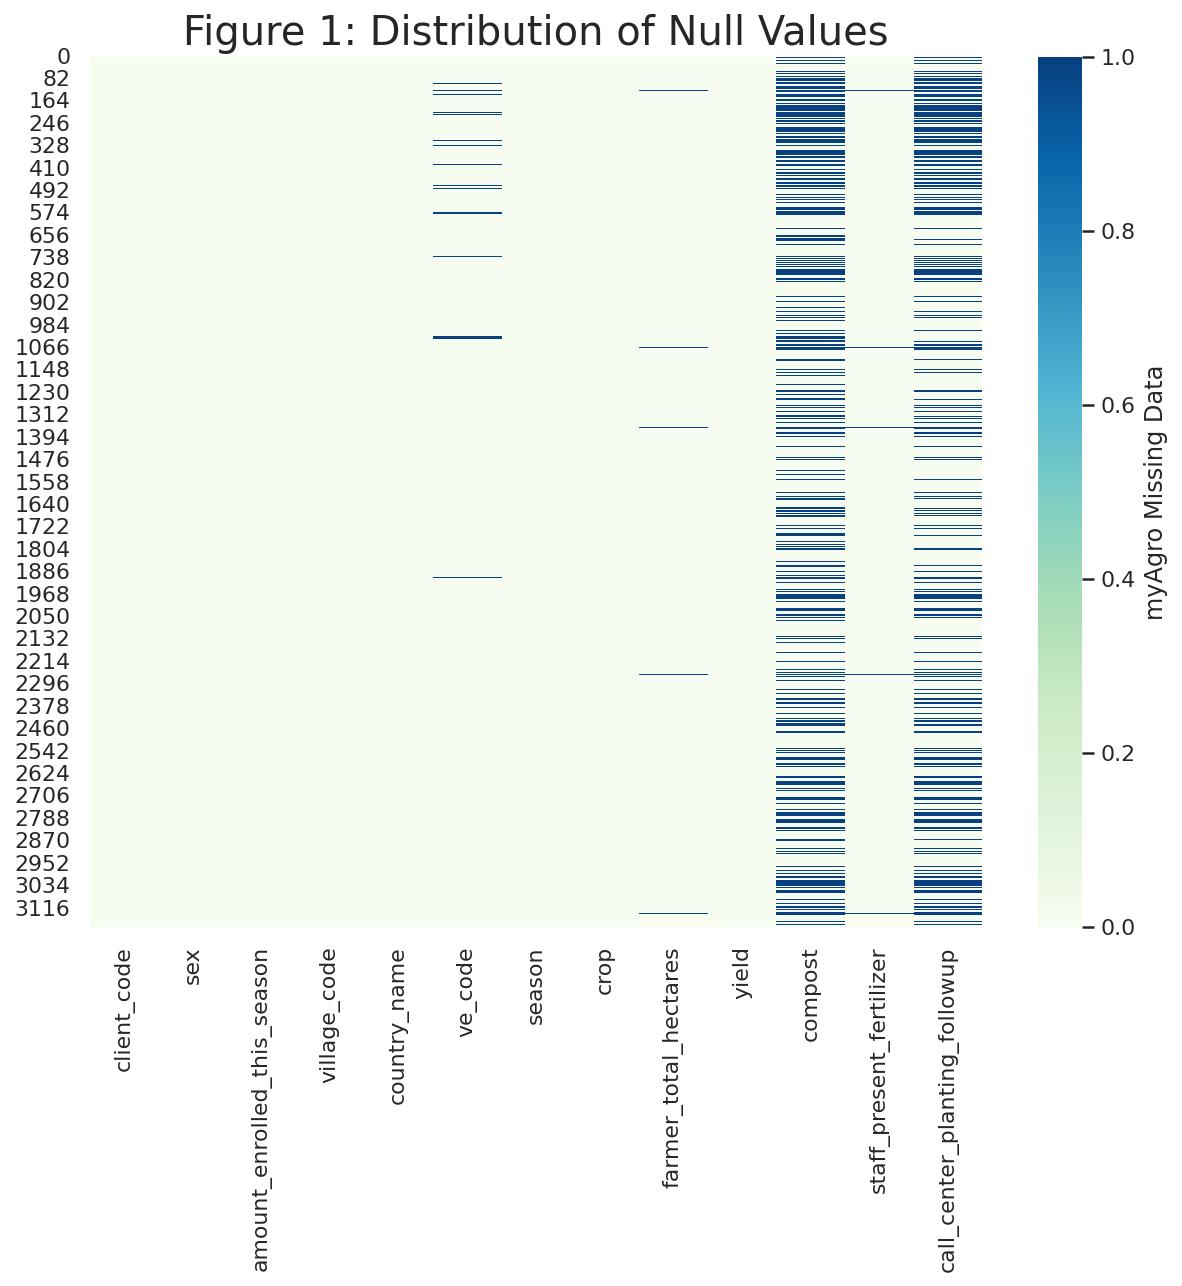

In [ ]:
# visualize missing data
display(df_1[df_1.isna().any(axis=1)])

plt.figure(figsize=(10,8))
nulls = sns.heatmap(df_1.isna(),
            cmap="GnBu",
            cbar_kws={'label': 'myAgro Missing Data'})
nulls.set_title('Figure 1: Distribution of Null Values', fontdict={'fontsize':20});

**➢ Observation:** 
1. Luckily, after carefully selecting key variables after merging `harvest` and `client` table, missing values appear to follow a pattern. Important variables such as `client_code`, `sex`, `crop`, `yield`, etc., have almost no missing values because these are the main aspects myAgro focuses on during data collection process. Other variables like `compost`, and `call_center_planting_followup` are less relevant to our analysis and have more missing values. 
1. As shown in the above dataframe, there are a total of 1088 rows containing at least one missing value. We don't intent to impute them since we will use python's groupby function to automatically exclude them in our yield analysis. 

### **<span id="Part1"> <font color="DarkGreen">2. Part I: Analysis on Key Variables that Impact Crop Yields</span>**

**➢ Having insights into how crop types and other variables impact yields enables myAgro to improve its sales strategy and implement better services for clients. Thus, we intend to exlpore in the following direction:**
* How crop yields differ across types and season?
* Is there any relationship between gender, yield, and total hectares owned? 
* Does myAgro's staff presence and compose application impact crop yields?

<ipython-input-14-85c51f5060a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['crop'] = df_1['crop'].str.capitalize() # capitalize crop name, use .loc[] to avoid chained indexing


season    yield                         
crop        Arachide  Mais   Mil   Riz Sorgho
0      2020     1.23  2.57  0.97  1.74   1.67
1      2021     1.42  2.15  0.90  2.63   1.90
2      2022     1.66  2.34  0.64  2.48   1.44

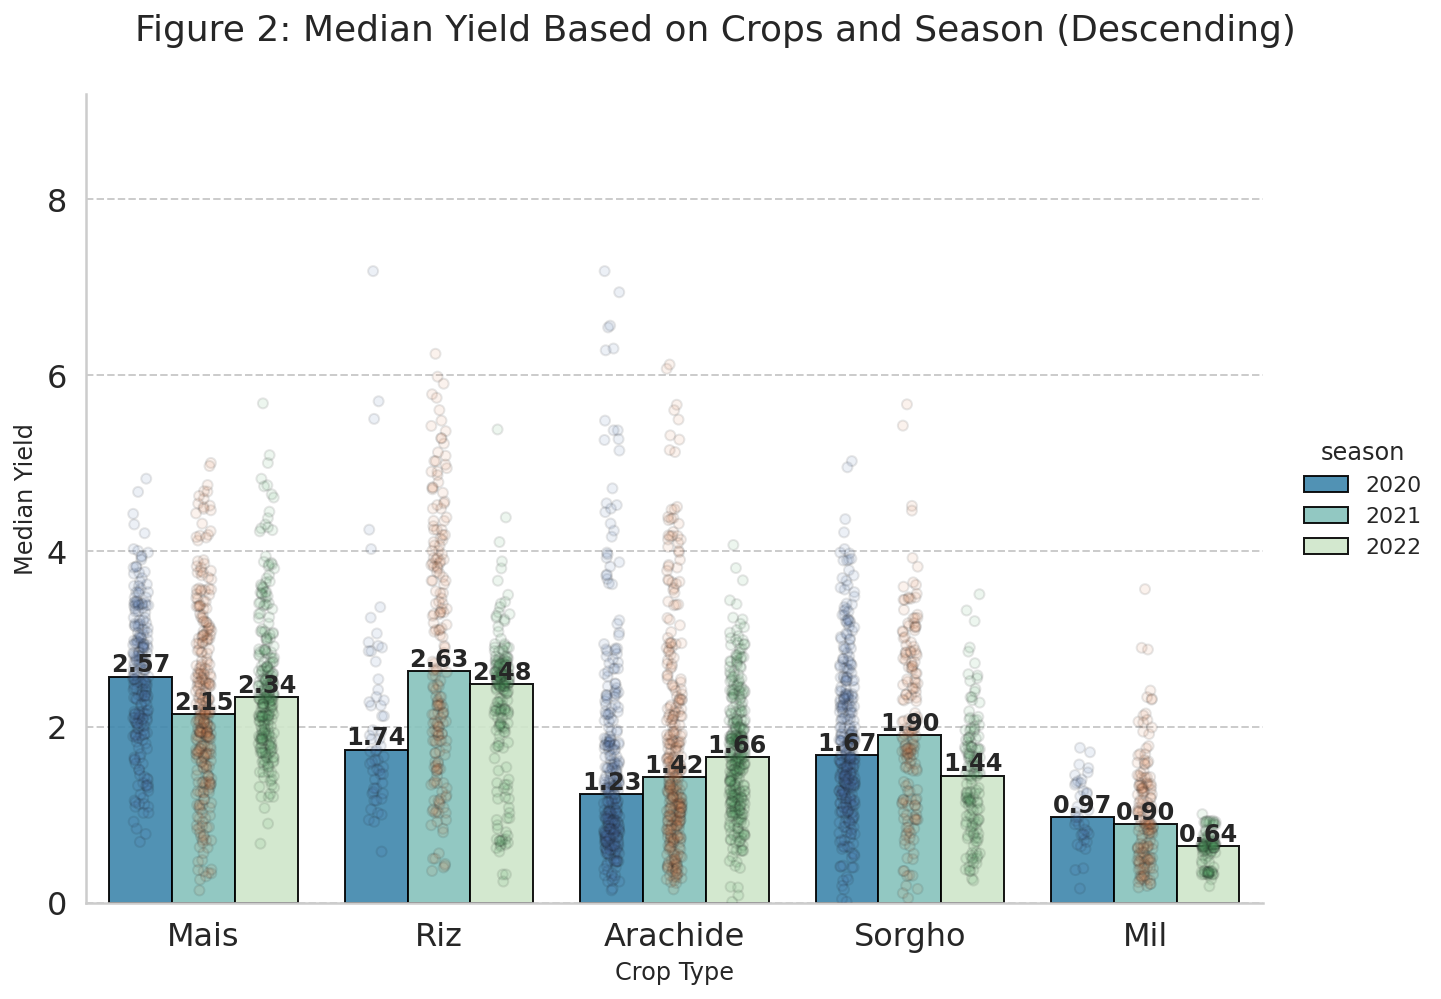

In [ ]:
# compute median crop yield based on crop types and country
df_1['crop'] = df_1['crop'].str.capitalize() # capitalize crop name, use .loc[] to avoid chained indexing
median_yield_df = pd.DataFrame(df_1.groupby(['crop', 'season'])['yield'].median()).reset_index()

# pivot table of yield, crop, and season, grouped by median value
median_yield_pivot = df_1.pivot_table(values=['yield'], columns=['crop'], index='season', aggfunc='median').round(2).reset_index()
display(median_yield_pivot)

order = ['Mais', 'Riz', 'Arachide', 'Sorgho', 'Mil']

# barplot
yield_dist = sns.catplot(x='crop', y='yield', hue='season', kind='bar', data=median_yield_df, order=order,
                         height=7, aspect=1.3, palette='GnBu_r', edgecolor='black', ci=None, alpha=.9)

# stirplot overlay
yield_dist.map(sns.stripplot, x='crop', y='yield', hue='season', data=df_1, order=order,
      palette=sns.color_palette(), dodge=True, alpha=0.1, ec='k', linewidth=1)

yield_dist.set(xlabel='Crop Type', ylabel='Median Yield')
yield_dist.fig.subplots_adjust(top=0.9)
yield_dist.fig.suptitle('Figure 2: Median Yield Based on Crops and Season (Descending)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# add annotations
for ax in yield_dist.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontweight='bold')
    ax.margins(y=0.28);

**➢ Observation:** 

***Note: Crops are represented in French, so mais=corn, riz=rice, arachide=peanut, sorgho=sorghum, mil=millet.***
1. From 2020-2022, mais and riz consistently exhibited higher median yields compared to the remaining crops. These two crops also require much more humidity to generate higher yields. Next, we'll exlpore how these crops differ across countries.

#### **2.1 Analyze Crop Yields Across Types and Seasons**

,country_name,farmer_total_hectares
0,Mali,8153.0
1,Senegal,5692.0


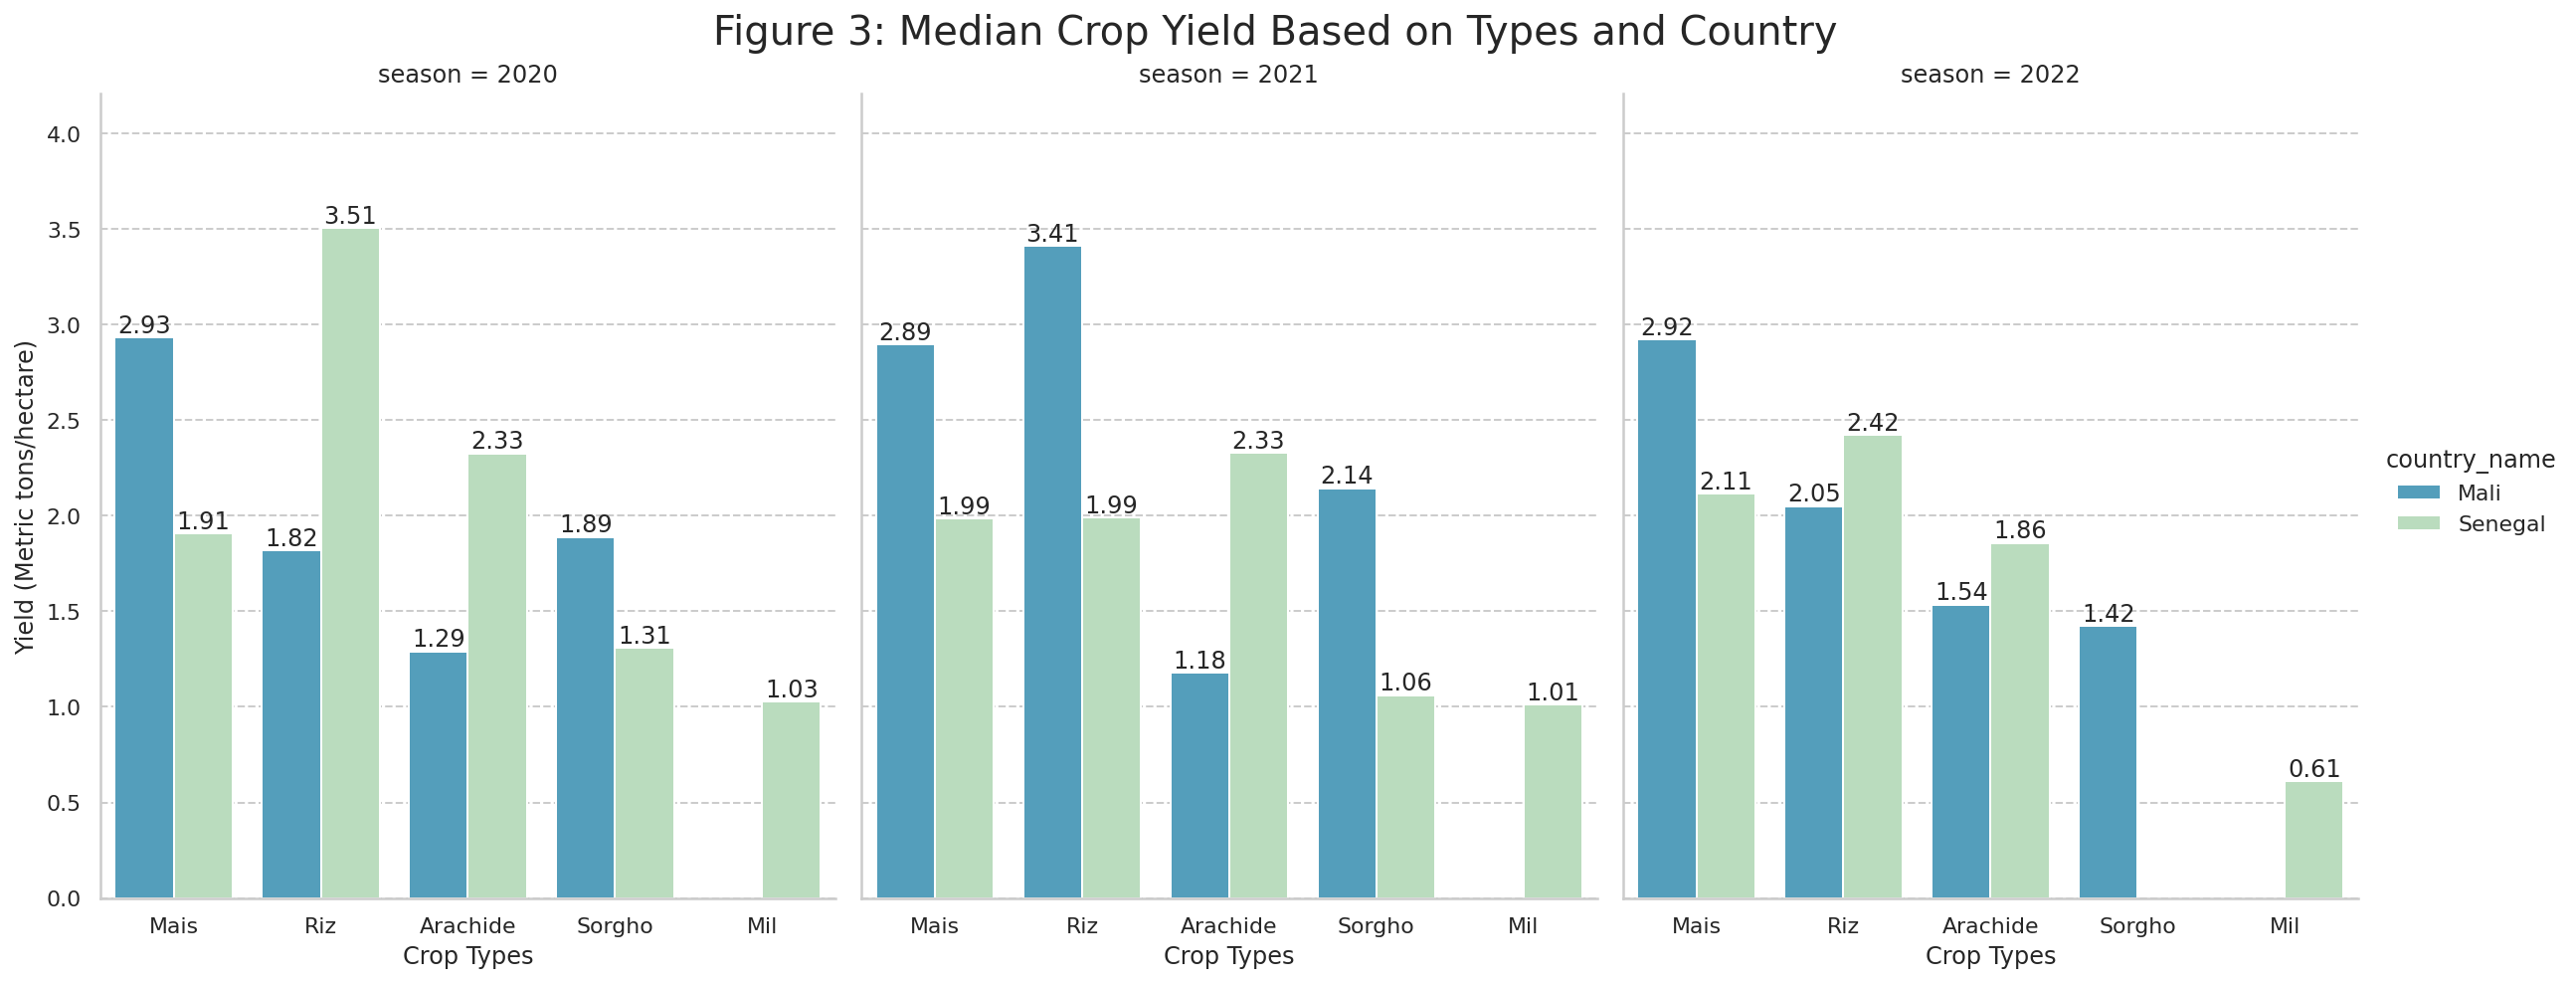

In [ ]:
# groupby country and total cultivatable land
display(pd.DataFrame(df_1.groupby('country_name')['farmer_total_hectares'].sum()).reset_index().round())

# yields based on country from 2020 - 2022
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})
g1 = sns.catplot(x='crop', y='yield', hue='country_name', col='season', data=df_1, 
                 kind='bar', order=order, height=7, aspect=.8, palette='GnBu_r', ci=None);

g1.set(xlabel='Crop Types', ylabel='Yield (Metric tons/hectare)')
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Figure 3: Median Crop Yield Based on Types and Country", fontsize = 20)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g1.facet_axis(0, 0)

# iterate through axes
for ax in g1.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2);

**➢ Observation:** 
1. As shown, **Mali consistently generated higher average yield in most crops compared to Senegal's result.** This may be due to geographic and weather conditions, but it could also be attributed to larger hectares owned in Mali (8153 hectares). Interestingly, **arachide (peanut)** yield in Senegal is higher and due to region-specific policies: peanut is the cash crop for many rural Senegalese and the price of related commodites are set by government commission$^1$.
1. **There is no mil sale in Mali from 2020-2022,** and mil's median yield in Senegal is dismal compared to other crops. Research suggests that Mali's farming is dominated by maize, potatoes, peas and other crops while the nutritious millet and sorghum are less popular$^2$.

*Source:* 

[Polishing Peanuts: The Senegalese Groundnut Story](https://gro-intelligence.com/insights/polishing-peanuts-the-senegalese-groundnut-story) by Gro Intelligence.

[Integrating poverty reduction policies into development strategies](https://horizon.documentation.ird.fr/exl-doc/pleins_textes/divers17-06/010012893.pdf) by Jean-Luc Dubois, January 1998. 

[Knowledge + passion: Women’s recipe in millet and sorghum production in Mali](https://www.cgiar.org/news-events/news/knowledge-passion-womens-recipe-in-millet-and-sorghum-production-in-mali/) by CGIAR Research Program.

In [ ]:
# groupby season, crops, yield, and amount_enrolled
df_2 = round(pd.DataFrame(df_1.groupby(['crop', 'season']).agg({'yield':'mean', 'amount_enrolled_this_season':'mean'})).reset_index())
order = ['Mais', 'Riz', 'Arachide', 'Sorgho', 'Mil']
yield_amount_pivot = df_1.pivot_table(values=['yield', 'amount_enrolled_this_season'], 
                                      columns=['crop'], index='season', aggfunc='mean').round()
yield_amount_pivot

amount_enrolled_this_season                                     \
crop                      Arachide     Mais      Mil     Riz   Sorgho   
season                                                                  
2020                        6644.0  13300.0   1316.0  4305.0   8654.0   
2021                        8486.0   7117.0   5854.0  7646.0   6046.0   
2022                       13975.0  37289.0  12076.0  9127.0  37142.0   

          yield                        
crop   Arachide Mais  Mil  Riz Sorgho  
season                                 
2020        2.0  3.0  1.0  2.0    2.0  
2021        2.0  2.0  1.0  3.0    2.0  
2022        2.0  2.0  1.0  2.0    1.0

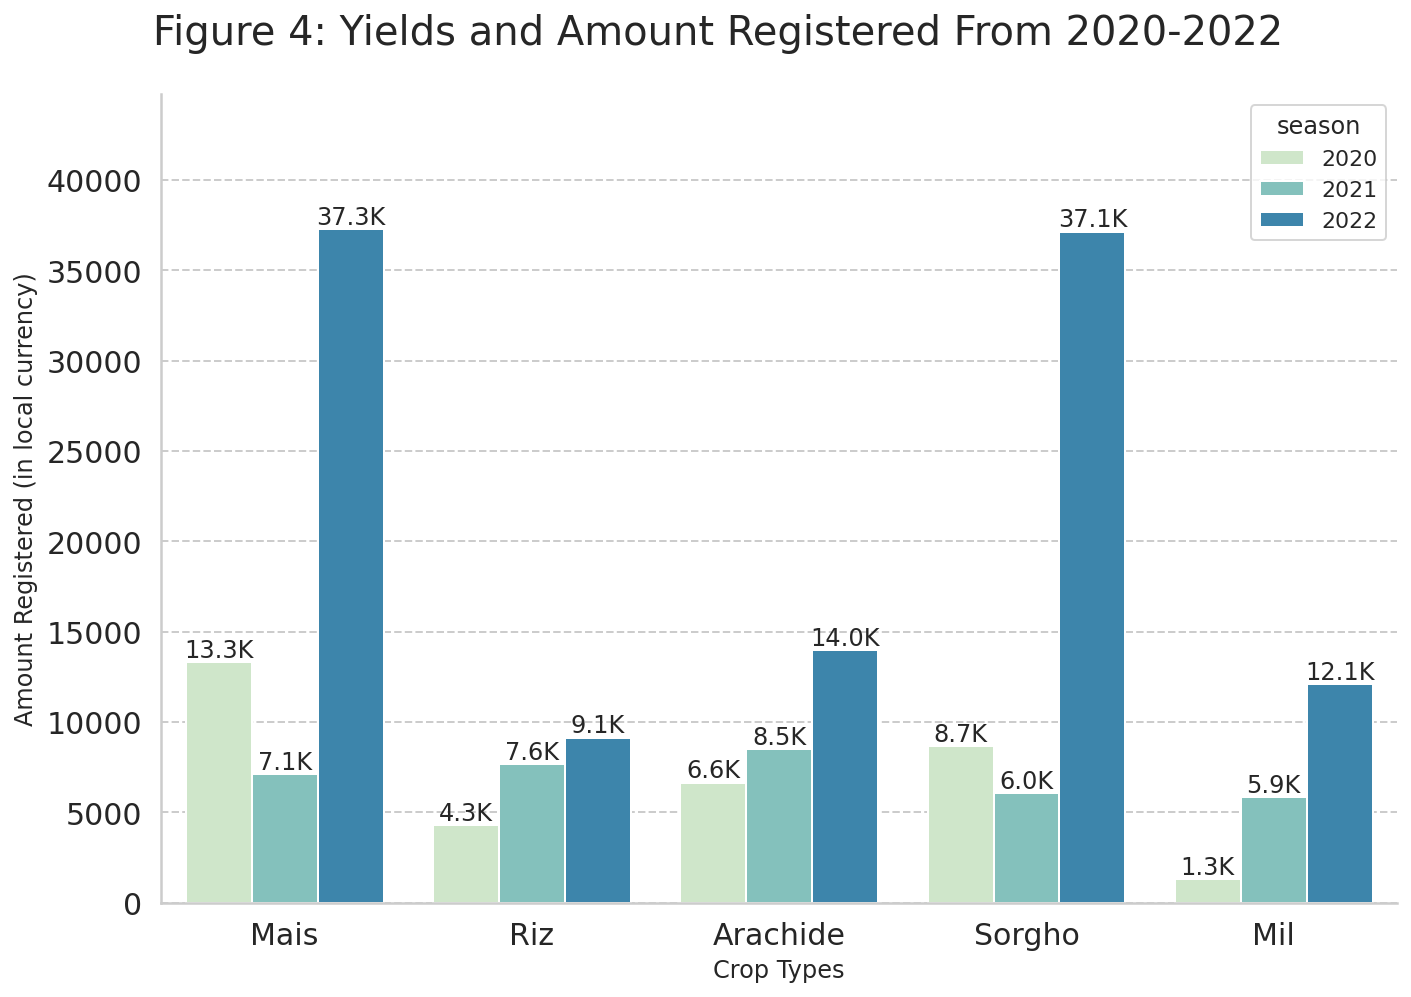

In [ ]:
# yields & amount_enrolled from 2020 - 2022
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

g2 = sns.catplot(x='crop', y='amount_enrolled_this_season', hue='season', data=df_2, order=order,
                 legend_out=False, kind='bar', palette='GnBu', height=7, aspect=1.4, ci=None);
g2.set(xlabel='Crop Types', ylabel='Amount Registered (in local currency)')
g2.fig.subplots_adjust(top=.9)
plt.tick_params(axis='both', which='major', labelsize=15)
g2.fig.suptitle("Figure 4: Yields and Amount Registered From 2020-2022", fontsize = 20);

ax = g2.facet_axis(0, 0)

for ax in g2.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2);

**➢ Observation:** 

1. **Both mais and sorgho experienced tremendous enrollment volumns by myAgro's farmers.** Sorgho, in particular, has become a cheaper alternative to wheat products as wheat prices soar due to squeezed exports from Ukraine$^1$. Therefore, it makes sense to see a spike in sorgho's registered amount in 2022. 
1. **Mais has the highest amount registered (37.3k CFA).** This is supported by our previous finding that mais has the highest median yield in 2022 in Mali (*~2.92 tons/hectare*), boosting farmers confidence to purchase more from myAgro.

*Source:* [As Wheat Prices Soar, Africa Pivots to Cheaper Alternatives](https://www.bloomberg.com/news/features/2022-05-08/as-wheat-prices-soar-africa-turns-to-cheaper-grains?leadSource=uverify%20wall) by Eamon Akil Farhat, Bloomberg.

#### **2.2 Analyze Crop Yields and Total Hectares Owned Based on Gender**

Text(0.5, 0.98, 'Figure 5a: Land Ownership Distribution')

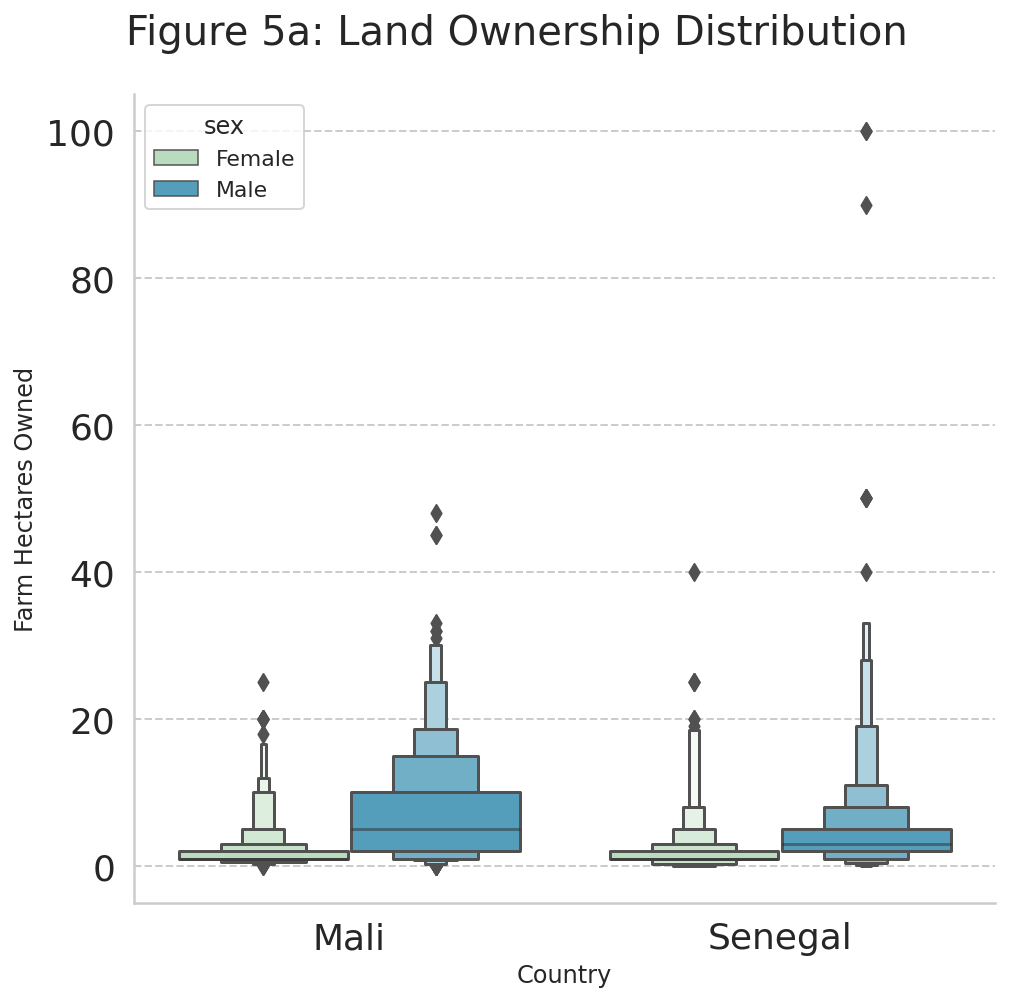

In [ ]:
# groupby country, yield, and land owned by male and female farmers
land_gender = pd.DataFrame(df_1.groupby(['country_name', 'sex', 'season']).agg({'yield':'mean', 'farmer_total_hectares':'sum'}).reset_index())
land_gender.pivot_table(values=['farmer_total_hectares','yield'],columns='sex',index=['season','country_name'],aggfunc='mean').round(2)

# yields, total hectares, gender, and country patterns from 2020 - 2022
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})
g3 = sns.catplot(x='country_name', y='farmer_total_hectares', hue='sex', data=df_1, legend_out=False,
                 palette='GnBu', kind='boxen', height=7, aspect=1);

g3.set(xlabel='Country', ylabel='Farm Hectares Owned')
g3.fig.subplots_adjust(top=0.9)
plt.tick_params(axis='both', which='major', labelsize=18)
g3.fig.suptitle("Figure 5a: Land Ownership Distribution", fontsize = 20)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Figure 5b: Yield Difference by Gender and Season')

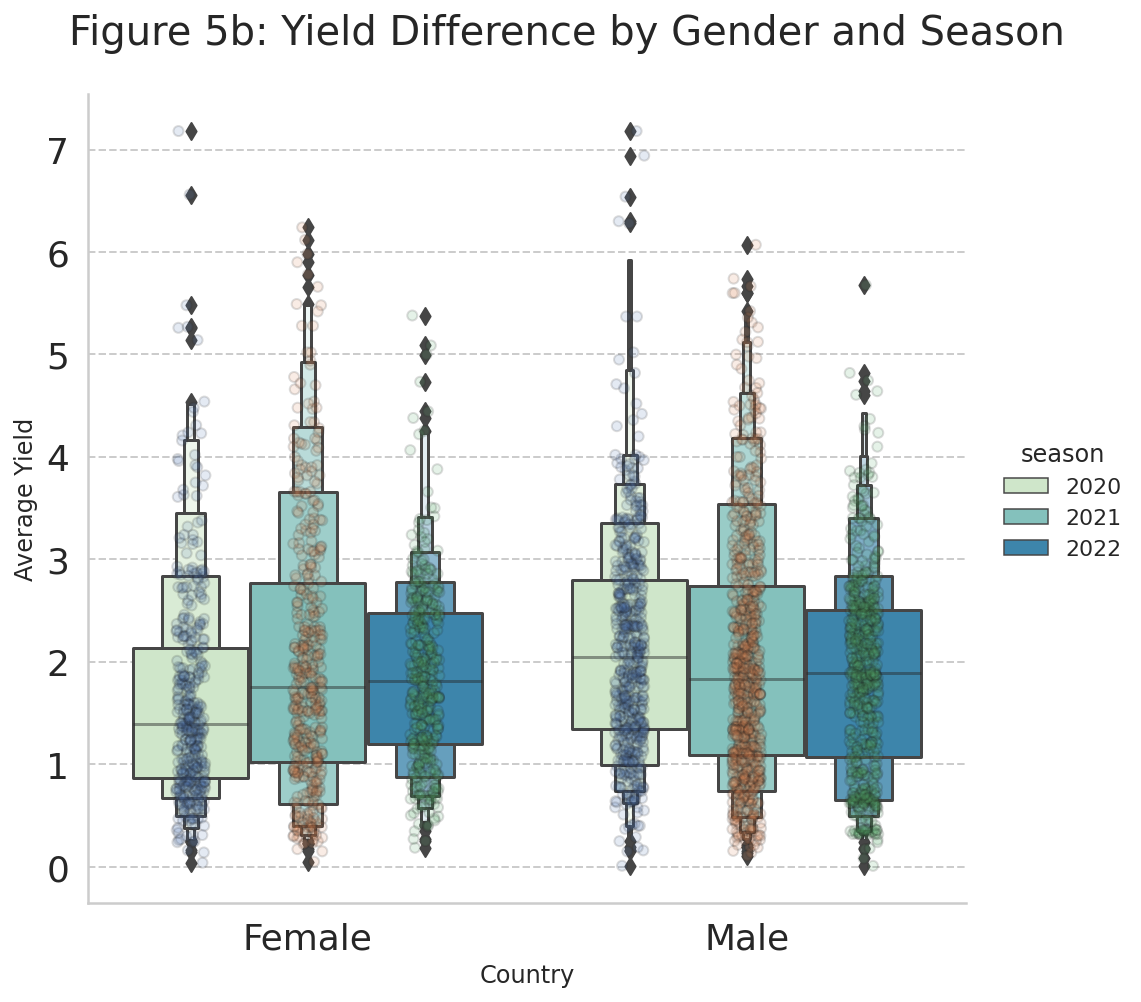

In [ ]:
# yield and land owned by gender
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

g3 = sns.catplot(x='sex', y='yield', hue='season', data=df_1, ci=False,
                 palette='GnBu', kind='boxen', height=7, aspect=1);

# stirplot overlay
g3.map(sns.stripplot, x='sex', y='yield', hue='season', data=df_1,
      palette=sns.color_palette(), dodge=True, alpha=0.15, ec='k', linewidth=1)

g3.set(xlabel='Country', ylabel='Average Yield')
g3.fig.subplots_adjust(top=0.9)
plt.tick_params(axis='both', which='major', labelsize=18)
g3.fig.suptitle("Figure 5b: Yield Difference by Gender and Season", fontsize = 20)

In [ ]:
# groupby country, yield, and land owned by male and female farmers
land_gender = pd.DataFrame(df_1.groupby(['country_name', 'sex', 'season']).agg({'yield':'mean', 'farmer_total_hectares':'sum'}).reset_index())
land_gender.pivot_table(values=['farmer_total_hectares','yield'],columns='sex',index=['season','country_name'],aggfunc='mean').round(2)

farmer_total_hectares           yield      
sex                                Female     Male Female  Male
season country_name                                            
2020   Mali                        799.26  2960.53   1.54  2.27
       Senegal                     131.20   916.00   2.26  1.87
2021   Mali                        427.42  1911.95   2.13  2.44
       Senegal                     398.08  2298.18   1.84  1.80
2022   Mali                        472.05  1581.80   1.75  2.12
       Senegal                     281.25  1655.25   2.03  1.70

**➢ Observation:** 
1. Interestingly, female farmer in Mali is the only group that experienced higher average yields from 2020 to 2022, while the rest groups saw decline in yields. 
2. **Regarding total hectares owned,** male farmers in both countries own more than double the amount female farmers do, even though women make up half or more of the agricultural workforce in Sub-Saharan Africa, growing 80% of the food$^1$. In Mali, myAgro could reach out to more female farmers to increase total farmland owned. In Senegal, myAgro could provide better trainings and services for female farmers to improve average yield. During the next phase of our project, we intend to dig deeper into this issue. 

*Source:* [What You Think You Know About Smallholder Farmers Is Probably Wrong](https://www.myagro.org/media-post/what-you-think-you-know-about-smallholder-farmers-is-probably-wrong/) by myAgro, July 27, 2022.

#### **2.3 Analyze Staff's Impact on Crop Yields Across Types**

In [ ]:
staff_yield_df = df_1.groupby(['crop', 'compost', 'season']).agg({'yield':'mean', 'farmer_total_hectares':'mean'}).reset_index()
staff_yield_pivot = df_1.pivot_table(values=['farmer_total_hectares', 'yield'],columns=['crop'],index=['season', 'compost'],aggfunc='mean').round(2)
staff_yield_pivot

farmer_total_hectares                             yield        \
crop                        Arachide  Mais   Mil   Riz Sorgho Arachide  Mais   
season compost                                                                 
2021   False                    1.77  5.21  8.32  2.41   5.87     1.42  2.21   
       True                     4.05  6.24  4.06  1.77   8.87     2.27  2.45   
2022   False                    2.57  5.94  5.35  2.18   4.27     1.72  2.47   
       True                     2.48  5.27  3.51  5.65   7.13     1.64  2.56   

                                   
crop             Mil   Riz Sorgho  
season compost                     
2021   False    1.14  2.80   1.92  
       True     1.31  2.95   2.12  
2022   False    0.65  2.33   1.38  
       True     0.55  1.74   1.79

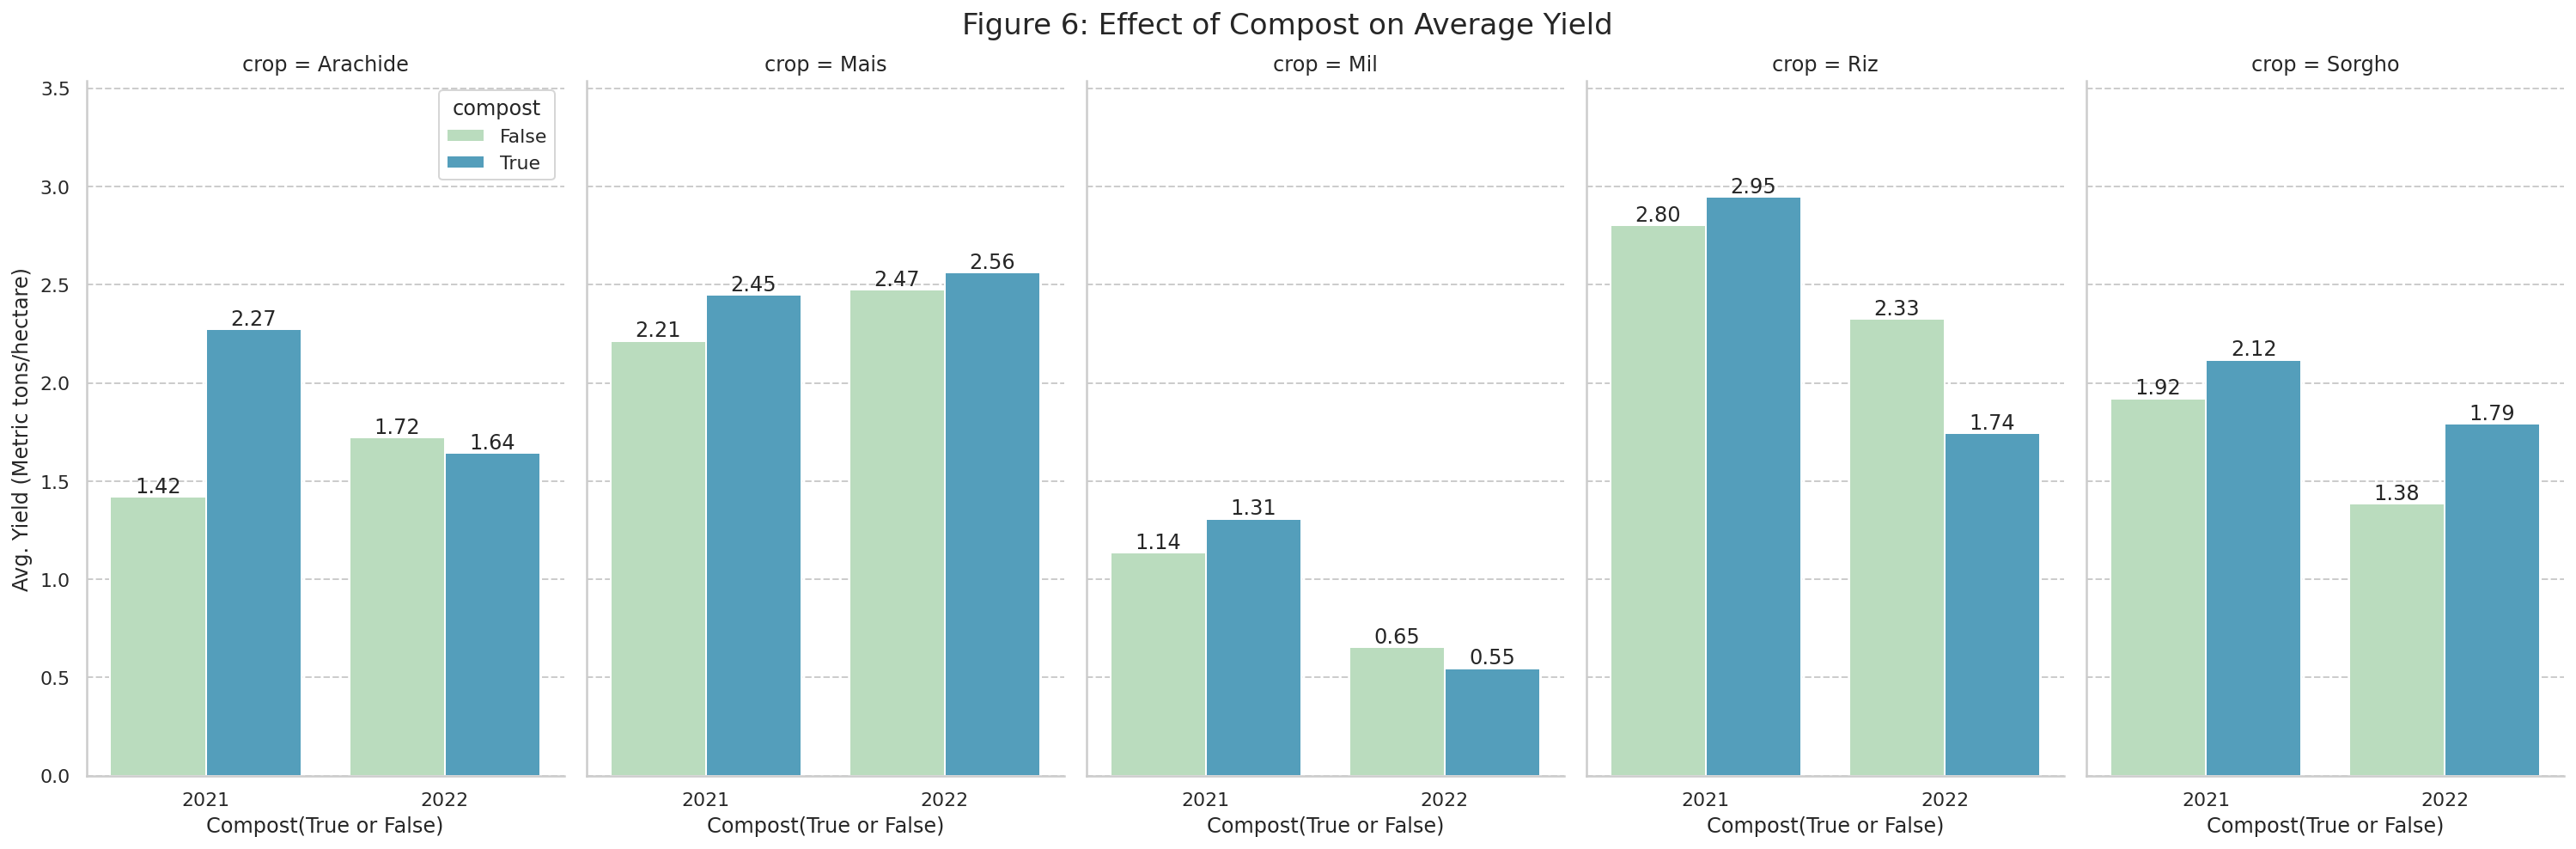

In [ ]:
# compost's impact on yield across season
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

g4 = sns.catplot(x='season', y='yield', hue='compost', col='crop', data=staff_yield_df, 
                 palette='GnBu', kind='bar', legend_out=False, height=7, aspect=.6, ci=None);

g4.set(xlabel='Compost(True or False)', ylabel='Avg. Yield (Metric tons/hectare)')
g4.fig.subplots_adjust(top=0.9)
g4.fig.suptitle("Figure 6: Effect of Compost on Average Yield", fontsize = 17)

ax = g4.facet_axis(0, 0)
for ax in g4.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2);

**➢ Observation:** 
1. In the graph above, we can conclude that if clients applied compost to mais, arachide, and sorgho, they would have higher average total yield. However, compost's impact on mil and riz is less significant. 
1. **Compost played a pivotal role in the production of 4 out 5 crops.** The highest difference in yield between the use or non-use of compost is in arachide - which means arachide were greatly benifited when compost was used. It was opposit for rice, where the yield was more for people who didnt use compost. This could be the fact that rice needs a combined application of fertilizers and compost in improving paddy yield as compared to their separate use.

*Source:* [Evaluation of the effect of compost as a substitution for inorganic fertilizers on yield of rice ](https://www.researchgate.net/publication/312171708_Evaluation_of_the_effect_of_compost_as_a_substitution_for_inorganic_fertilizers_on_yield_of_rice_Bg_94-1_in_Ampara_District) by Christina Shanthi De Silva, November 2016
Conference: Open University Research Sessions-2016.

### **<span id="Part2"> <font color="DarkGreen">3. Part II: Geo-Analytics of High-Yield Villages & Sales Patterns</span>**

**➢ Goal: In this section we are going to analyze the relationship between high-yield villages and their sales in the following season.**

We first define and state our strategy in this section. As suggested by Nessa, we define **high yield** as those who is above the 75% quantile for yield in that group.

1. Agriculture relies on crop, weather condition, soil condition and fertilizer. To make a rought division, we grouped all clients by their crop types and zone_code (which indicates the zone of the farm). Within each group, we recorded those clients who has yield above 75% quantile in his/her group and record the village code for the client. **If a village has one or more clients with high yield, then we view this village as high-yield village.**

2. **Sales is defined as total amount paid by client.** We excluded the rollover and inner-adjustment payment. We calculated total amount paid by a client in the following season of harvest, joined the payment dataset with harvest dataset on client_code to get sales. Then we calculate sales within a certain village, compared the mean/max of sales for villages with high-yield client or not.

Now we first draw a geographic map on the distribution of farms in Mali and Senegal in our sample harvest dataset.

#### **3.1 Geographic Distribution of myAgro's Client Villages**

In [ ]:
harvest_rs = harvest_raw[['client_code','season','crop','yield']]
client_rs = client_raw[['client_code','village_code','zone_code','district_name','country_name']]
payment_rs = payment_raw[['amount','is_rollover','is_audit','program','client_code','season']]

# pull out geographic location 
new = harvest_raw['field_geolocation'].str.split(' ',n=3, expand = True)
harvest_raw['Latitude'] = new[0].astype(float)
harvest_raw['Longitude'] = new[1].astype(float)

In [ ]:
!pip install contextily==1.0rc2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 6.1 MB/s 


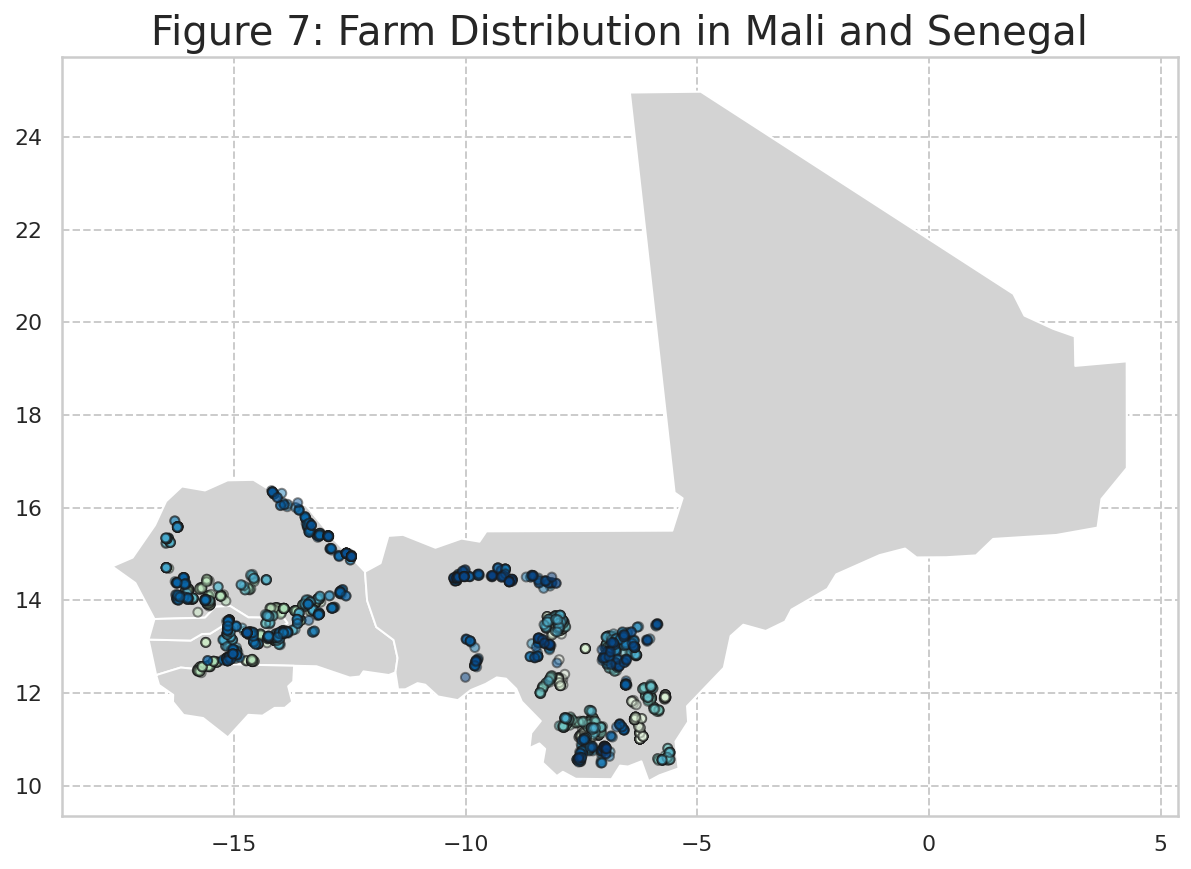

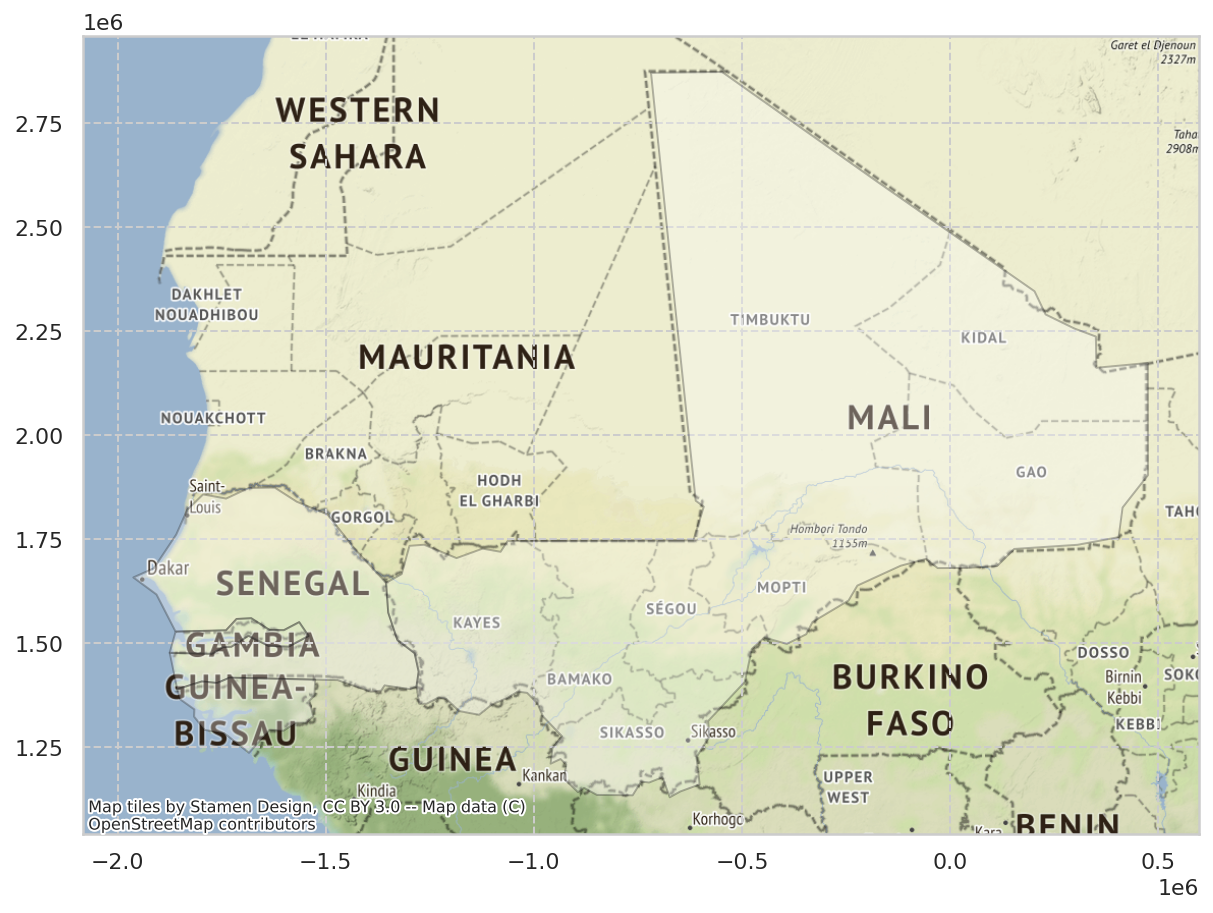

In [ ]:
# use geopandas 
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

from shapely.geometry import Point

long = harvest_raw['Longitude']
lat = harvest_raw['Latitude']
sa_map = gpd.read_file(data_folder + 'map_c.geojson')

fig,ax = plt.subplots(figsize = (10,10))
sa_map.plot(ax = ax)
geometry = [Point(xy) for xy in zip(long,lat)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
sa_map.crs
df_wm = sa_map.to_crs(epsg=3857)

sa_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
ax = geo_df.plot(ax = ax, markersize = 80, edgecolor='k', marker = '.',
                cmap = 'GnBu', legend = True, alpha = .5)
ax.set_title("Figure 7: Farm Distribution in Mali and Senegal", fontsize=20);
ax = df_wm.plot(figsize=(10,10), color='white', alpha=0.3, edgecolor='k', scheme="quantiles")
cx.add_basemap(ax);

**➢ Observation:** 
1. **The farms mostly distributed in the western part of Mali and center part of Senegal.** Larger area in center and eastern part of Senegal waiting to be cultivated. Additonally, northern parts of both countries are largely arid and Mali constantly experienced wars in the north. Numerous militant groups have taken advantage of the instability by attacking the Malian government and international security forces, undermining the government and threatening to destabilize neighboring countries$^1$. This directly impacts the geographic distribution of farms. 

*Source:* [Instability in Mali](https://www.cfr.org/global-conflict-tracker/conflict/destabilization-mali) by Center for Preventive Action, May 12, 2022. 

#### **3.2 Set High-Yield Cutoff and Select High-Yield Villages**

In [ ]:
# set type of client code to string
client_rs['client_code'] = client_rs['client_code'].astype(str)
harvest_rs['client_code'] = harvest_rs['client_code'].astype(str)
payment_rs['client_code'] = payment_rs['client_code'].astype(str)

# harvest and client table merge
harvest_and_client = harvest_rs.merge(client_rs, on='client_code', how = 'left')

# filter harvest data for season 2020
handc_2020 = harvest_and_client.loc[harvest_and_client['season'] == 2020]

# filter harvest data for season 2021
handc_2021 = harvest_and_client.loc[harvest_and_client['season'] == 2021]

# calculate quantile of high-yield based on zone_code and crop type
result = handc_2020.groupby(['zone_code', 'crop'])['yield'].quantile(0.75) # high-yield cutoff at 75th percentile
handc_2020['yield_cutoff'] = handc_2020.groupby(['zone_code', 'crop'])['yield'].transform(lambda x : x.quantile(0.75))
hyield_2020 = handc_2020.loc[handc_2020['yield'] > handc_2020['yield_cutoff']]

result = handc_2021.groupby(['zone_code', 'crop'])['yield'].quantile(0.75) # high-yield cutoff at 75th percentile
handc_2021['yield_cutoff'] = handc_2021.groupby(['zone_code', 'crop'])['yield'].transform(lambda x : x.quantile(0.75))
hyield_2021 = handc_2021.loc[handc_2021['yield'] > handc_2021['yield_cutoff']]

# count unique villages in 2020
print(f"Number of 2020 high-yield villages is: {len(hyield_2020.village_code.unique())}")
print(f"Number of 2020 high-yield clients is: {len(hyield_2020.client_code.unique())}")
print(f"Number of 2020 villages is: {len(handc_2020.village_code.unique())}")
print(f"Number of 2020 client is: {len(handc_2020.client_code.unique())}")
print(f"Number of 2021 high-yield villages is: {len(hyield_2021.village_code.unique())}")
print(f"Number of 2021 high-yield clients is: {len(hyield_2021.client_code.unique())}")
print(f"Number of 2021 villages is: {len(handc_2021.village_code.unique())}")
print(f"Number of 2021 client is: {len(handc_2021.client_code.unique())}")

<ipython-input-26-bd62eedf7f00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_rs['client_code'] = client_rs['client_code'].astype(str)
<ipython-input-26-bd62eedf7f00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harvest_rs['client_code'] = harvest_rs['client_code'].astype(str)
<ipython-input-26-bd62eedf7f00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Number of 2020 high-yield villages is: 97
Number of 2020 high-yield clients is: 253
Number of 2020 villages is: 135
Number of 2020 client is: 972
Number of 2021 high-yield villages is: 63
Number of 2021 high-yield clients is: 298
Number of 2021 villages is: 77
Number of 2021 client is: 1165


<ipython-input-26-bd62eedf7f00>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handc_2020['yield_cutoff'] = handc_2020.groupby(['zone_code', 'crop'])['yield'].transform(lambda x : x.quantile(0.75))
<ipython-input-26-bd62eedf7f00>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handc_2021['yield_cutoff'] = handc_2021.groupby(['zone_code', 'crop'])['yield'].transform(lambda x : x.quantile(0.75))


**➢ Observation:** Based on our findings, 97 of the villages contains at least one high-yield client with a total of 135 villages in the harvest dataset. This means 71.85% of myAgro's client villages achieved the high-yield standard in 2020, and that portion increased to 81.81% (63 out of 77) in 2021, accomplishing meaningful results. 

#### **3.3 Calculate True Amount in Field Revenue and Sum Up by Village**

**Note:** From myAgro's Data Dictionary, we followed the instruction to remove rollover payments, audit payments, and "ML 2023 Loyalty Bonus Program" from our following analysis since they don't count towards true field revenues collected from farmers. **We calculate field revenues using the `amount` column which is measured in CFA (local currency in Mali & Senegal).**

In [ ]:
#recall our payment dataset
payment_rs = payment_raw[['amount', 'is_rollover', 'is_audit', 'program', 'client_code', 'season']]

# create new column called "true amount" which excludes the rollover/audit payment and those in program 'ML 2023 Loyalty Bonus Program'
payment_rs['true_amount'] = np.where(((payment_rs['is_rollover'] == False) & (payment_rs['is_audit'] == False)\
                                      & (payment_rs['program'] != 'ML 2023 Loyalty Bonus Program'))\
                                      , payment_rs['amount'], 0)

# Sum up total amount of one client using sum over true_amount in 2021
payment_rs['total_amount'] = payment_rs['true_amount'].groupby(payment_raw['client_code']).transform('sum')
payment_2021 = payment_rs[payment_rs['season'].str.contains('2021',na = True)] # extract 2021 season
payment_2022 = payment_rs[payment_rs['season'].str.contains('2022',na = True)]
payment_2021.info()
payment_2022.info()

<ipython-input-27-e1a8af9f28c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_rs['true_amount'] = np.where(((payment_rs['is_rollover'] == False) & (payment_rs['is_audit'] == False)\
<ipython-input-27-e1a8af9f28c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_rs['total_amount'] = payment_rs['true_amount'].groupby(payment_raw['client_code']).transform('sum')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871492 entries, 19 to 4111937
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   amount        871492 non-null  float64
 1   is_rollover   871492 non-null  bool   
 2   is_audit      871492 non-null  bool   
 3   program       55911 non-null   object 
 4   client_code   870791 non-null  object 
 5   season        871490 non-null  object 
 6   true_amount   871492 non-null  float64
 7   total_amount  870791 non-null  float64
dtypes: bool(2), float64(3), object(3)
memory usage: 48.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 746988 entries, 0 to 4111951
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   amount        746988 non-null  float64
 1   is_rollover   746988 non-null  bool   
 2   is_audit      746988 non-null  bool   
 3   program       115227 non-null  object 
 4   client

In [ ]:
# payment information in 2021
payment_use_2021 = payment_2021.drop_duplicates(subset = ['client_code'])
display(payment_use_2021.head())

# use inner join to combine 2020 harvest table with 2021 sales table
final_2020 = handc_2020.merge(payment_use_2021,on='client_code',how = 'inner')
final_2020.info()

,amount,is_rollover,is_audit,program,client_code,season,true_amount,total_amount
19,1000.0,False,False,NaN,1334054,SN 2021,1000.0,95000.0
22,1000.0,False,False,NaN,1334426,SN 2021,1000.0,62000.0
46,2000.0,False,False,NaN,1292311,ML 2021,2000.0,40000.0
66,2000.0,False,False,NaN,51766,ML 2021,2000.0,75000.0
81,1000.0,False,False,NaN,2105527,ML 2021,1000.0,21000.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 561
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   client_code    562 non-null    object 
 1   season_x       562 non-null    int64  
 2   crop           562 non-null    object 
 3   yield          562 non-null    float64
 4   village_code   562 non-null    object 
 5   zone_code      562 non-null    object 
 6   district_name  562 non-null    object 
 7   country_name   562 non-null    object 
 8   yield_cutoff   562 non-null    float64
 9   amount         562 non-null    float64
 10  is_rollover    562 non-null    bool   
 11  is_audit       562 non-null    bool   
 12  program        45 non-null     object 
 13  season_y       562 non-null    object 
 14  true_amount    562 non-null    float64
 15  total_amount   562 non-null    float64
dtypes: bool(2), float64(5), int64(1), object(8)
memory usage: 67.0+ KB


**➢ Observation:** Only 562 clients out of 972 that have harvest records in 2020 purchased materials from myAgro in 2021 season. 

  is_high_yield_village  village_total
0                    No       243500.0
1                   Yes       319848.0


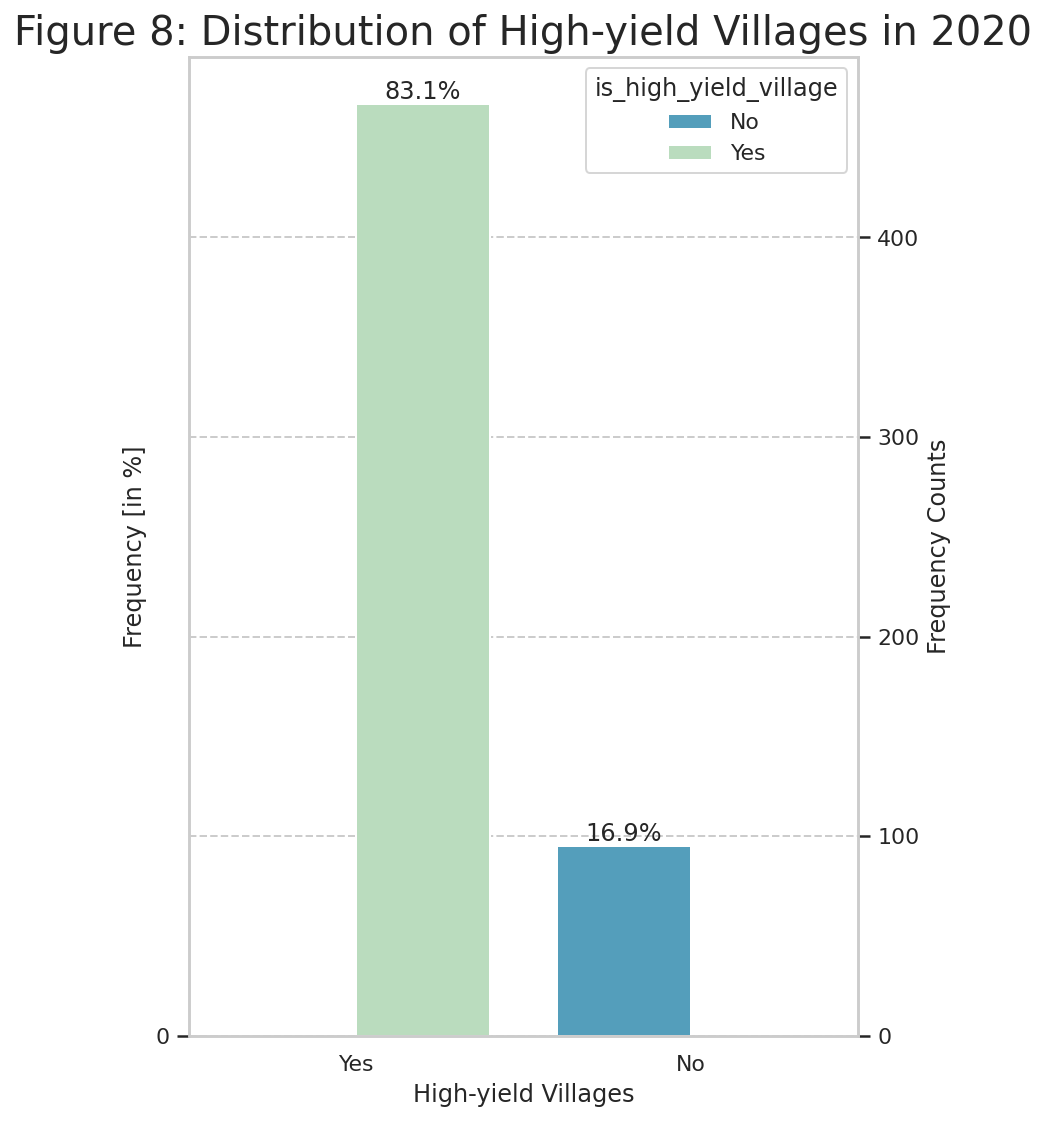

In [ ]:
# create new column for high-yield village binary classification
High_village = hyield_2020.village_code.unique()
final_2020['is_high_yield_village'] = np.where(final_2020['village_code'].isin(High_village), 'Yes', 'No')
village_clf = final_2020[['is_high_yield_village']]
ncount = len(village_clf)

# 2020 village distribution results
final_2020['village_total'] = final_2020['total_amount'].groupby(final_2020['village_code']).transform('sum')
final_use = final_2020.drop_duplicates(subset = ['village_code'])
print(pd.DataFrame(final_use.groupby('is_high_yield_village')['village_total'].mean().round()).reset_index())

# countplot of high-yield villages
plt.figure(figsize=(6,9))
ax = sns.countplot(data=village_clf, x='is_high_yield_village', hue='is_high_yield_village', order=['Yes', 'No'], palette='GnBu_r');
ax.set_title('Figure 8: Distribution of High-yield Villages in 2020', fontdict={'fontsize':20})
plt.xlabel('High-yield Villages')

ax2=ax.twinx() # create twin axis
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_ylabel('Frequency Counts')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [in %]')

for p in ax.patches: # annotate % and counts
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount),  (x.mean(), y), 
            ha='center', va='bottom')

ax2.yaxis.set_major_locator(ticker.MultipleLocator(20)) # set ticker size
ax2.grid(None)
plt.savefig('Fig8.png')

**➢ Observation:** Based on the countplot, 83% of villages in 2020 who successfully made payments in 2021 achieved high yields. From the groupby result, we confirmed our expectation that high-yield villages have higher average total payment amount compared to low-yield ones. The difference is 76,348 CFA in 2021. 

**Citation:** The above `countplot()` with frequencies and twin axis is built upon stack overflow's recommended code block. *Source: [Seaborn: countplot() with frequencies](https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies)*

In [ ]:
pd.DataFrame(final_use.groupby('is_high_yield_village')['village_total'].mean().round()).reset_index()

,is_high_yield_village,village_total
0,No,243500.0
1,Yes,319848.0


In [ ]:
#payment information in 2020
payment_2020 = payment_rs[payment_rs['season'].str.contains('2020',na = True)]
payment_2020['total_amount'] = payment_2020['true_amount'].groupby(payment_2020['client_code']).transform('sum')
payment_use_2020 = payment_2020.drop_duplicates(subset = ['client_code'])
final_test = handc_2020.merge(payment_use_2020,on='client_code',how = 'inner')
final_test['is_high_yield_village'] = np.where(final_test['village_code'].isin(High_village) , 'Yes', 'No')
village_clf2 = final_test[['is_high_yield_village']]

final_test['village_total'] = final_test['total_amount'].groupby(final_test['village_code']).transform('sum')
final_use2 = final_test.drop_duplicates(subset = ['village_code'])
pd.DataFrame(final_use2.groupby('is_high_yield_village')['village_total'].mean().round()).reset_index()

<ipython-input-31-64978a10309e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_2020['total_amount'] = payment_2020['true_amount'].groupby(payment_2020['client_code']).transform('sum')


,is_high_yield_village,village_total
0,No,123838.0
1,Yes,227340.0


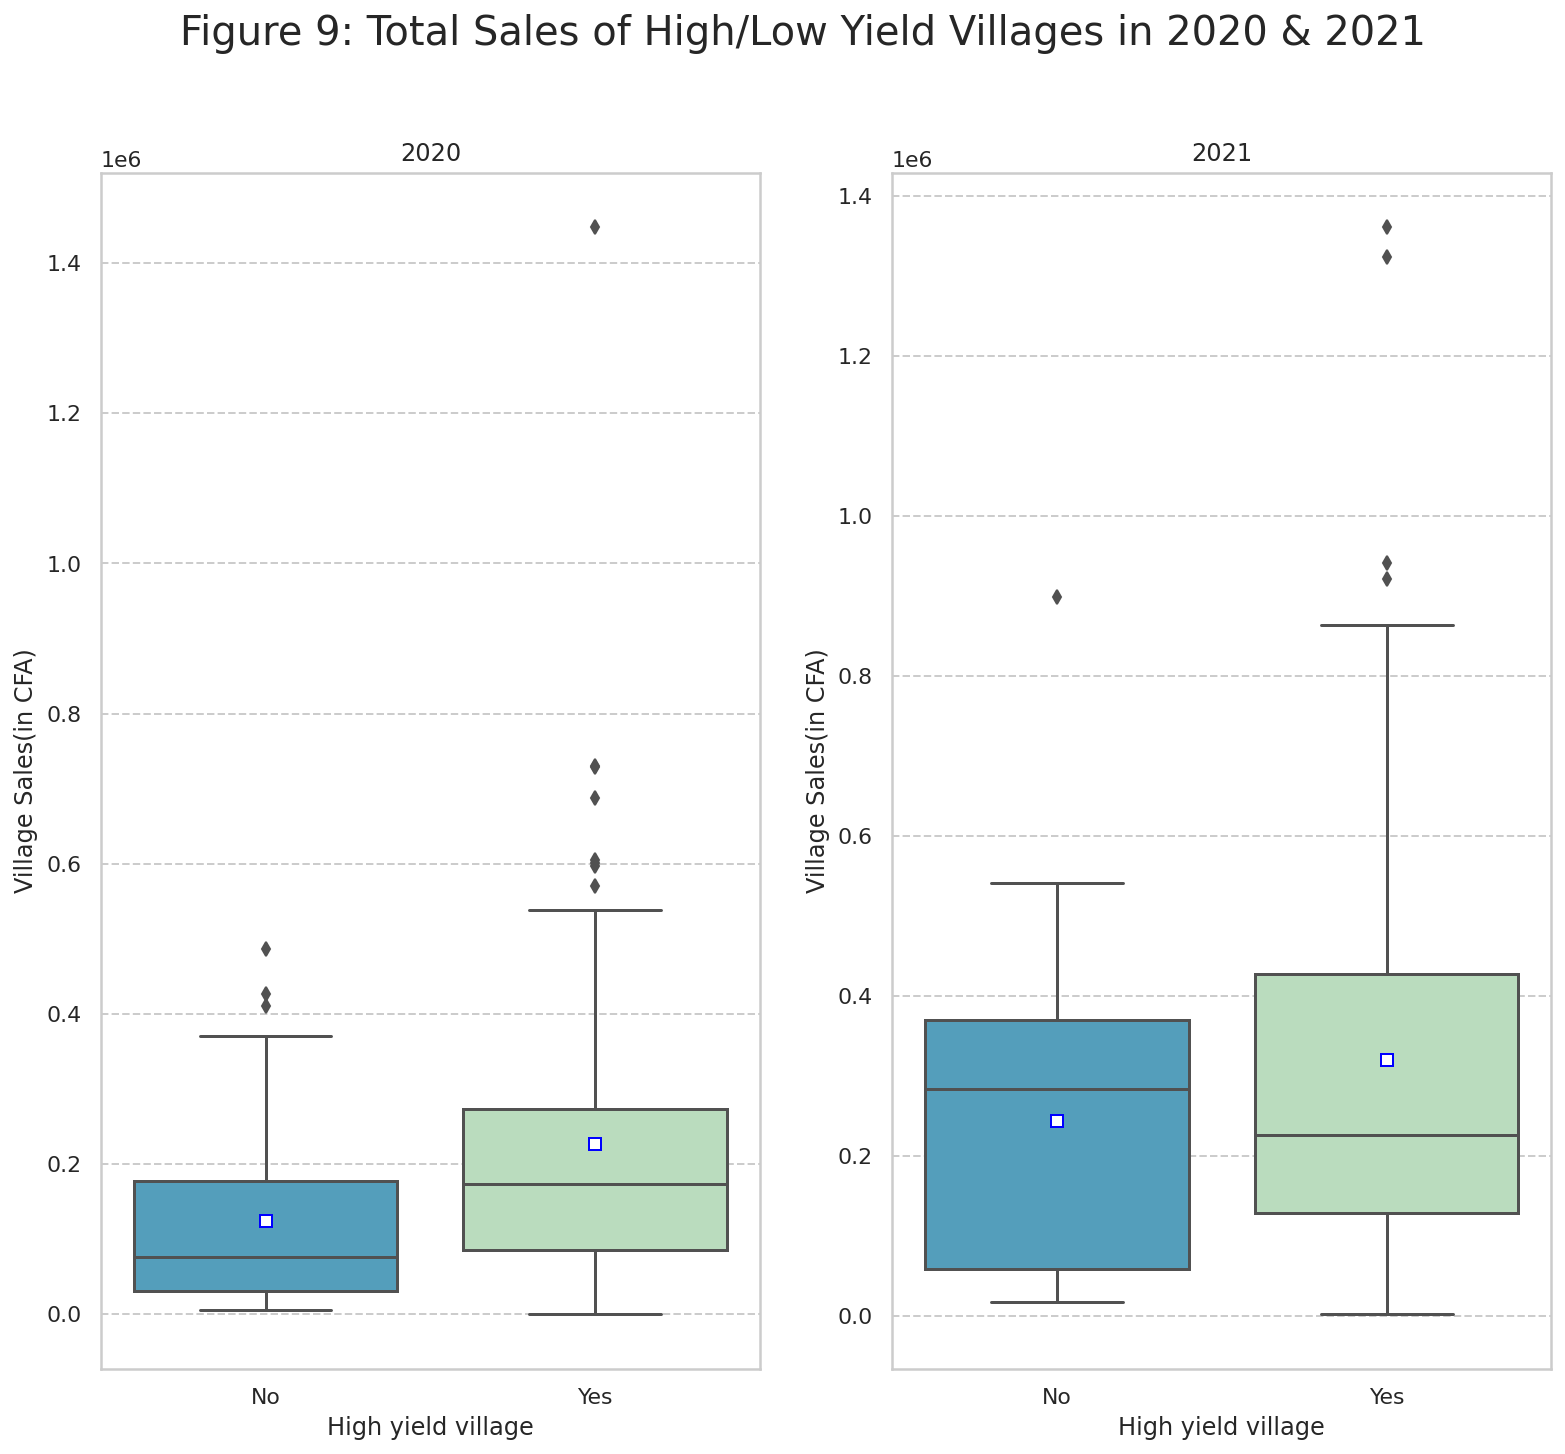

In [ ]:
plt.figure(figsize=(13,11))
plt.subplot(1, 2, 1)
graph = sns.boxplot(x = final_use2['is_high_yield_village'],
            y = final_use2['village_total'], palette='GnBu_r',showmeans = True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
graph.set_title('2020', fontdict={'fontsize':12})
graph.set(xlabel = 'High yield village', ylabel = 'Village Sales(in CFA)')
plt.suptitle('Figure 9: Total Sales of High/Low Yield Villages in 2020 & 2021', fontsize=20)
plt.subplot(1, 2, 2)

graph2 = sns.boxplot(x = final_use['is_high_yield_village'],
            y = final_use['village_total'], palette='GnBu_r',showmeans = True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
graph2.set_title('2021')
graph2.set(xlabel = 'High yield village', ylabel = 'Village Sales(in CFA)');
plt.savefig('Fig9.png')

**➢ Observation:**
1. Based on our findings, high yield village has a higher average of total sales within the village compared to non-high yield villages. The sample size is 96 and 38 respectively. If we compare these high yield villages(based on harvest 2020) and compare their sales from 2020 to 2021, we can see that both high-yield and non-high yield villages has an increase in sales.

2. For consistency of the dataset, we use consistent definition on high-yield villages. That is, high-yield village sales in 2020 still uses the harvest data from 2020 to see how these villages change sales.

3. In a quantitative aspect,the **average** sales for high-yield villages rise from **189,072** to **216,213**(currency in CFA) from 2020 to 2021 while the **average** sales for non-high yield villages rise from **95,789** to **125,315** from 2020 to 2021.

4. The non-high yield villages shows a larger proportion in increase but the absolute difference in average sales within these two groups remains the same. This indicates that **high-yield** villages tend to  **purchase more** on average compared to non-high yield villages.

➢ **Analyze how does training offering affect  farmers' yield?**

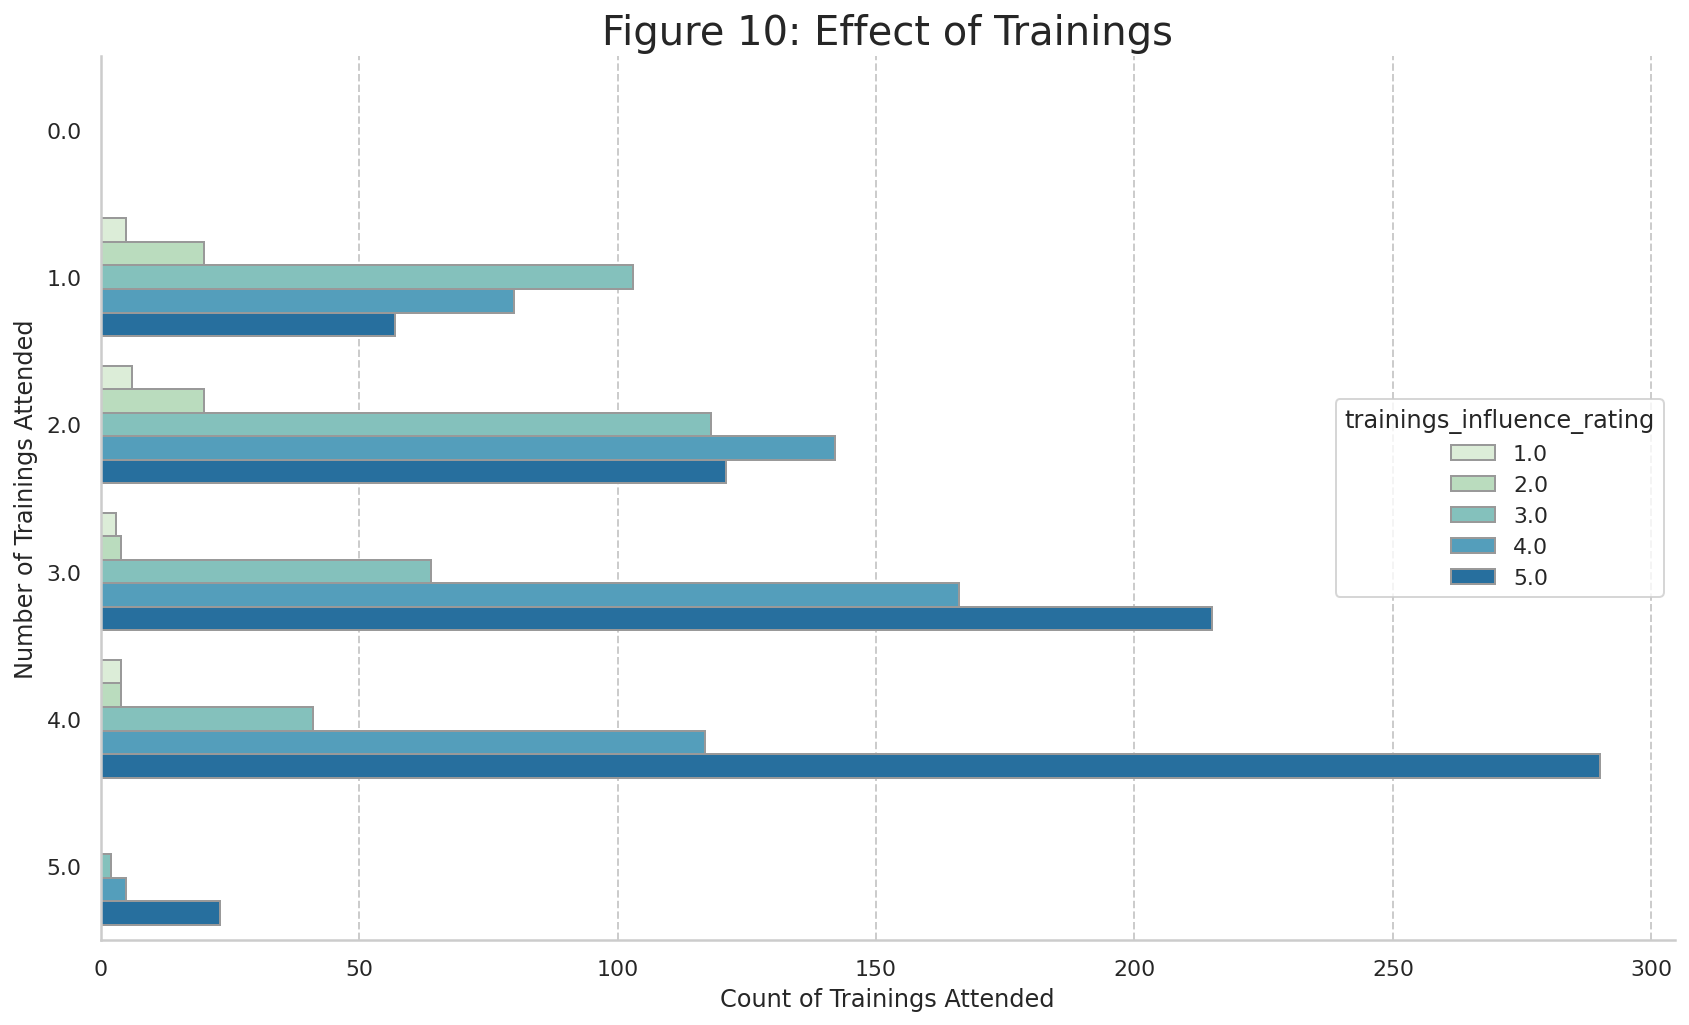

In [ ]:
sns.catplot(data=harvest_raw, y="trainings_attended", hue="trainings_influence_rating", kind="count",
    palette="GnBu", edgecolor=".6", height=7, aspect=1.7, legend_out=False);
plt.title('Figure 10: Effect of Trainings', fontdict={'fontsize':20})
plt.ylabel('Number of Trainings Attended')
plt.xlabel('Count of Trainings Attended');
plt.savefig('Fig10.png')

**➢Observation**:
1. Because 5 training programs only offered in 2021, the total
number of trainings farmers attended is much more less than others. In this graph, 5 points high rating was given to people who attended 4 training programs. **Overall, the more trainings they attended, the more influential they would gain from training.**
___

### **<span id="Rec"> <font color="DarkGreen">Concluding Remarks and Potential Recommendation</span>**

1. **Implement an incentive referral program to farmers** and offering women discounts or add-ons in their next order when they refer someone. As data suggest female farmers in Mali are the only group that experienced higher average yields from 2020 to 2022, we can start this program from Mali and expand it based on the result. It will help empower more women to work in agriculture and grow myAgro's client base.
1. We suggest myAgro **experimenting different farming techniques**, like intercropping, especially between millet and peanuts. This will increase crop yield and provide economic benefits under rain-fed conditions. As shown in Figure 10, myAgro can provide effective training and sell intercropping-specific products that will receive positive feedback from farmers.
1. myAgro faces difficulty in keeping consistent data entry for customer IDs year after year. Our recommendation is to **choose an offline tablet survey technology** with a system where data engineers can efficiently trace IDs using names, addresses, and/or farm codes. myAgro staff needs data collection trainings and strictly follow protocols in data consistency. **myAgro can also set up a different system for incentivizing respondents for participating and completing a survey correctly.**
---

### **<span id="References"> <font color="DarkGreen">References</span>**



*1. "A Transparent, Easy Way For Smallholder Farmers To Save", myAgro, Forbes, June 28, 2022. https://www.myagro.org/media-post/a-transparent-easy-way-for-smallholder-farmers-to-save/*

*2. "Polishing Peanuts: The Senegalese Groundnut Story by Gro Intelligence, https://gro-intelligence.com/insights/polishing-peanuts-the-senegalese-groundnut-story*

*3. "Integrating poverty reduction policies into development strategies", Jean-Luc Dubois, January 1998. https://horizon.documentation.ird.fr/exl-doc/pleins_textes/divers17-06/010012893.pdf*

*4. "Analysis: Africa’s unreported extreme weather in 2022 and climate change", CarbonBrief, October 26, 2022. https://www.carbonbrief.org/analysis-africas-unreported-extreme-weather-in-2022-and-climate-change/*

*5. "What You Think You Know About Smallholder Farmers Is Probably Wrong", myAgro, July 27, 2022. https://www.myagro.org/media-post/what-you-think-you-know-about-smallholder-farmers-is-probably-wrong/*

*6. "Instability in Mali", Center for Preventive Action, May 12, 2022. https://www.cfr.org/global-conflict-tracker/conflict/destabilization-mali*

*7. "Evaluation of the effect of compost as a substitution for inorganic fertilizers on yield of rice" (Bg 94-1) in Ampara District. https://www.researchgate.net/publication/312171708_Evaluation_of_the_effect_of_compost_as_a_substitution_for_inorganic_fertilizers_on_yield_of_rice_Bg_94-1_in_Ampara_District*